In [1]:
#Performing feature engineering & EDA of retail dataset that contains household level transactions over two years from 
#A group of 2,500 households who are frequent shoppers at a retailer & perform clustering 

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [50]:
#Loading Demographic & transactional Data

Demodata = pd.read_csv('hh_demographic.csv')
Trandata = pd.read_csv('transaction_data.csv')

In [51]:
Demodata.head()

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0      65+                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K        Unknown     2 Adults Kids   
3    25-34                   U      75-99K      Homeowner     2 Adults Kids   
4    45-54                   B      50-74K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  
0                   2      None/Unknown              1  
1                   2      None/Unknown              7  
2                   3                 1              8  
3                   4                 2             13  
4                   1      None/Unknown             16

In [52]:
############################## EDA of Demographic dataset ###########################################

In [53]:
def pie_categorical(Demodata):
    #function to plot the histogram of categorical variables in pie graph
    features = Demodata.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        Demodata[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1
def hist_numeric(Demodata):
    #function to plot the histogram of numeric variables
    features = Demodata.columns
    fig_hists = plt.figure(figsize=(15,15))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        Demodata[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

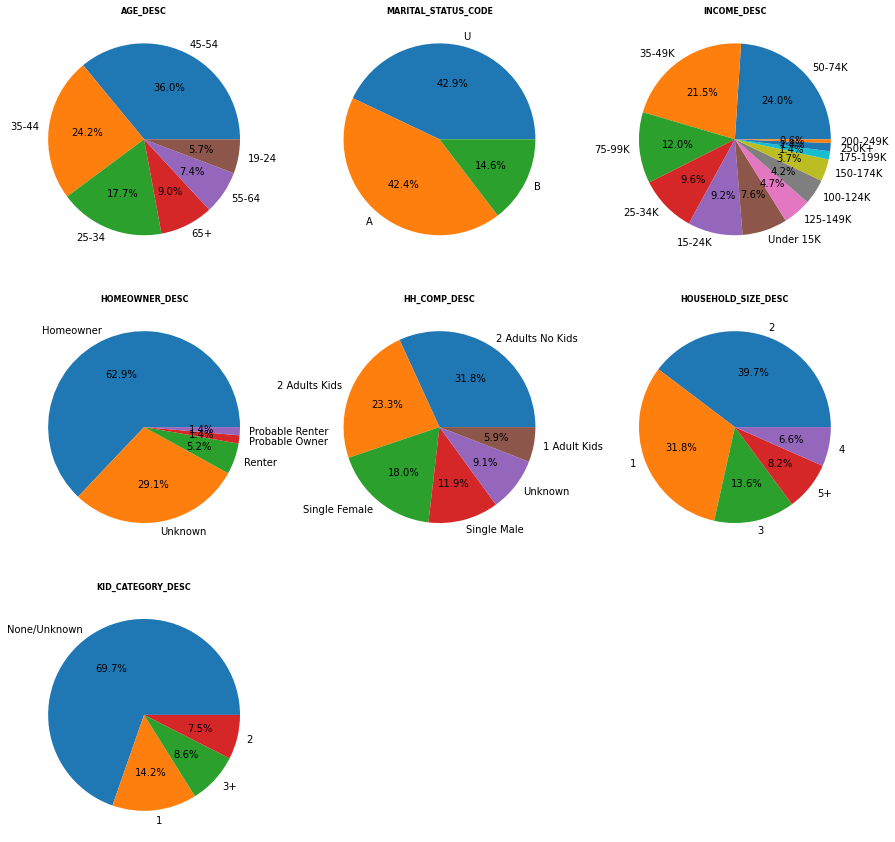

In [54]:
pie_categorical(Demodata.drop("household_key",axis=1))

In [55]:
# Consolidated Analysis from Transactional dataset

#************************************************************************************************************

#Customers earning high among 801 households : 668 [Considering (100 - 250k) range as lowest]
#Customers earning low among 801 households : 133 [Considering (35 - 99k) range as lowest]

#************************************************************************************************************

#Customers within Age Group 35-54 : (24.2 +36)% = 60.2% = 482
#Customers within Age Group 19-34 : (5.7 + 17.7)% = 23.4% = 187
#Customers within Age Group 55-65: (7.4 + 9.0)% = 16.4% = 131

#************************************************************************************************************

# 62.9% customers are homeowner(Count 503) & rest all are renter,probable owner. 

#************************************************************************************************************

# 31.8% Customers family details : 2 Adult No Kids 
# 23.3% Customers family details : 2 Adults Kids 

In [56]:
Trandata.head()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  
0       364        -0.60        1631        1          0.0                0.0  
1       364         0.00        1631        1          0.0                0.0  
2       364        -0.30        1631        1          0.0                0.0  
3       364         0.00        1631        1          0.0                0.0  
4       364        -0.39        1631        1          0.0                0.0

In [57]:
############################## EDA of transactional dataset ###########################################

In [58]:
TrandataEDA = pd.read_csv('transaction_data.csv')

In [59]:
def week_to_month(x):
        if x < 5:
            x = '1'
        elif x < 9:
            x = '2'
        elif x < 13:
            x = '3'
        elif x < 17:
            x = '4' 
        elif x < 21:
            x = '5' 
        elif x < 25:
            x = '6'
        elif x < 29:
            x = '7' 
        elif x < 33:
            x = '8' 
        elif x < 41:
            x = '9'
        elif x < 45:
            x = '10' 
        elif x < 49:
            x = '11'
        elif x < 53:
            x = '12' 
        elif x < 57:
            x = '13'
        elif x < 61:
            x = '14'
        elif x < 65:
            x = '15' 
        elif x < 69:
            x = '16' 
        elif x < 73:
            x = '17'
        elif x < 77:
            x = '18' 
        elif x < 81:
            x = '19' 
        elif x < 85:
            x = '20'
        elif x < 89:
            x = '21' 
        elif x < 93:
            x = '22'
        elif x < 97:
            x = '23' 
        else:
            x = '24'
        return x

In [60]:
#Converting week to month 

TrandataEDA['Month'] = TrandataEDA.WEEK_NO.apply(week_to_month)
TrandataEDA.head()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  \
0       364        -0.60        1631        1          0.0                0.0   
1       364         0.00        1631        1          0.0                0.0   
2       364        -0.30        1631        1          0.0                0.0   
3       364         0.00        1631        1          0.0                0.0   
4       364        -0.39        1631        1          0.0                0.0   

  Month  
0     1  
1     1  
2     1  
3     1  
4     1

In [61]:
# Trying to figure out which month had highest sale in two years

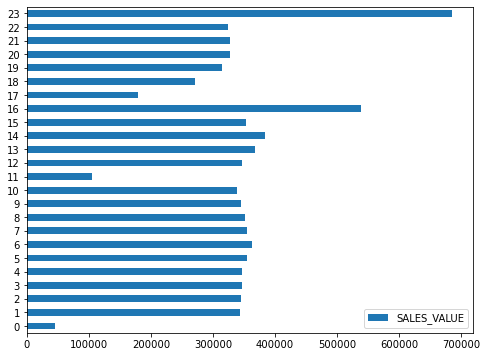

In [62]:
sales_monthwise = TrandataEDA.groupby("Month").sum()["SALES_VALUE"].reset_index()
sales_monthwise.plot(figsize=(8,6),kind='barh', stacked=True);

In [63]:
# From the EDA of transactional dataset highest sale happen on month of september of yr1 & month of December of yr2
# From the above pattern it has been observed mid of the first yr to second year end sales pattern of retailer was 
# consistent in nature. 

In [64]:
# Trying to figure out which stores had highest sales in past two years

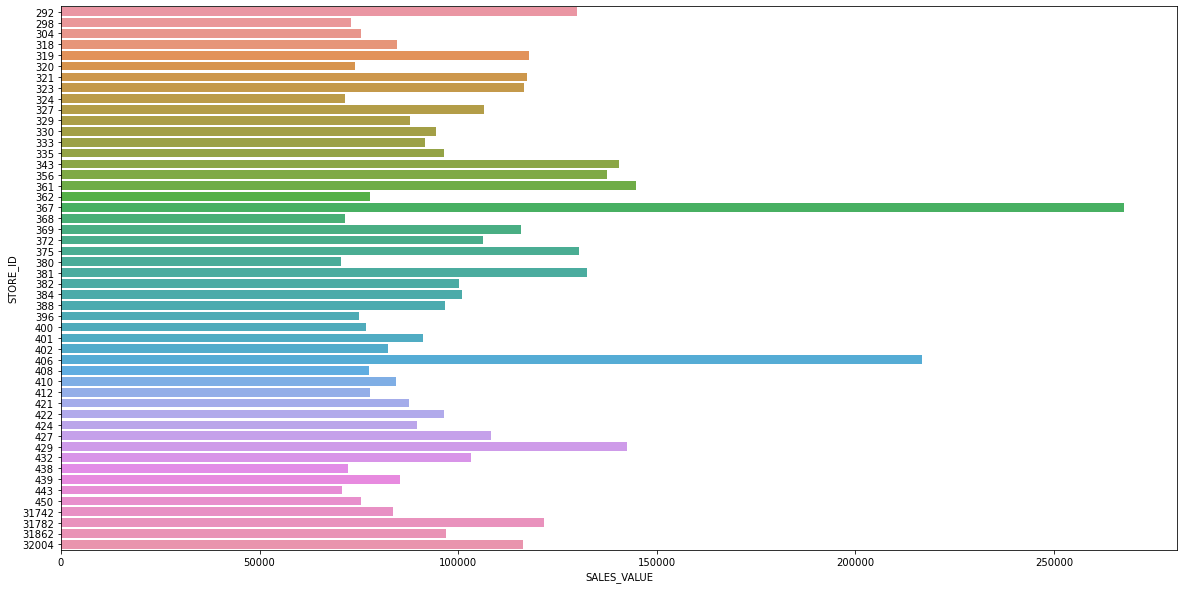

In [65]:
store_details = TrandataEDA.groupby("STORE_ID").sum()["SALES_VALUE"].reset_index()
store_details.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_50_selling_store = store_details.head(50)
plt.figure(figsize=(20,10))
sns.barplot(y="STORE_ID",x="SALES_VALUE",data=top_50_selling_store,orient="h")
plt.show()

In [66]:
# From the EDA of transactional dataset store with ID 367 had highest sales & store id 406 had second highest sales
# during two yrs. 

In [67]:
# Trying to figure out from which household maximum money was spend in past two years.

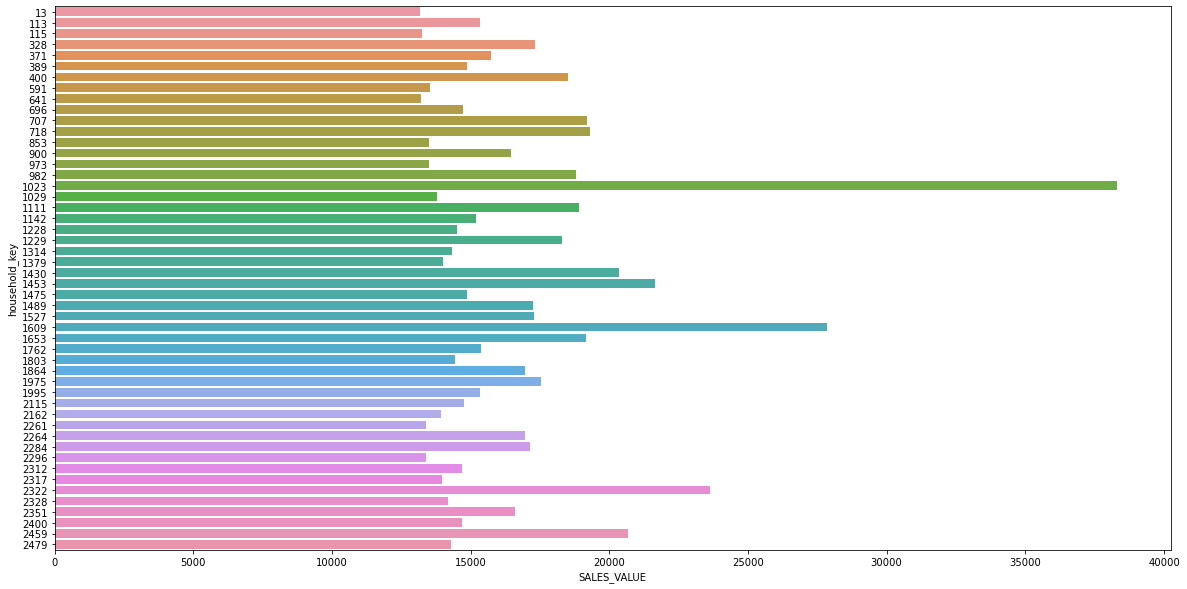

In [68]:
household_details = TrandataEDA.groupby("household_key").sum()["SALES_VALUE"].reset_index()
household_details.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_50_household = household_details.head(50)
plt.figure(figsize=(20,10))
sns.barplot(y="household_key",x="SALES_VALUE",data=top_50_household,orient="h")
plt.show()

In [69]:
# From the EDA of transactional dataset hosehold 1023 has spend more money in last two years, Second highest household 
# spend most of the money is 1609.

In [70]:
# Consolidated Analysis from Transactional dataset

#****************************************************************************************************************

# Monthly sales Analysis of retailer in two years:

# From the EDA of transactional dataset highest sale happen on month of september of yr1 & month of December of yr2
# From the above pattern it has been observed mid of the first yr to second year end sales pattern of retailer was 
# consistent in nature.

#****************************************************************************************************************
# Store Analysis of retailer in two years:

# Top 10 stores : 

#STORE_ID	SALES_VALUE
#367         267614.34
#406         216781.77
#361         144698.85
#429         142391.01
#343         140455.75
#356         137588.68
#381         132488.15
#375         130396.51
#292         130005.18
#31782       121726.54

# Store with ID 367 had highest sales & store id 406 had second highest sales during two yrs. 

#****************************************************************************************************************

# Household Analysis of retailer in two years:

# Top 10 households :

#household_key	SALES_VALUE
#1023           38319.79
#1609           27859.68
#2322           23646.92
#1453           21661.29
#2459           20671.5
#1430           20352.99
#718            19299.86
#707            19194.42
#1653           19153.75
#1111           18894.72


In [71]:
####################################### Performing EDA of Product dataset #####################################

In [72]:
Product = pd.read_csv('product.csv')
mergeProduct = pd.merge(TrandataEDA,Product,on="PRODUCT_ID",how="left")
mergeProduct.head()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  \
0       364        -0.60        1631        1          0.0                0.0   
1       364         0.00        1631        1          0.0                0.0   
2       364        -0.30        1631        1          0.0                0.0   
3       364         0.00        1631        1          0.0                0.0   
4       364        -0.39        1631        1          0.0                0.0   

  Month  MANUFACTURER DEPARTMENT     BRAND               COMMODITY_DESC  \
0     1            69    PRODUCE   Private                     POTATOES   
1     1             2    PRODUCE  National                       ONIONS   
2     1            69    PRODUCE   Private      VEGETABLES - ALL OTHERS   
3     1             2    PRODUCE  National               TROPICAL FRUIT   
4     1            69    PRODUCE   Private  ORGANICS FRUIT & VEGETABLES   

           SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
0  POTATOES RUSSET (BULK&BAG)                 5 LB  
1     ONIONS SWEET (BULK&BAG)                40 LB  
2                      CELERY                       
3                     BANANAS                40 LB  
4             ORGANIC CARROTS                 1 LB

In [73]:
# Trying to figure out top departments had sold maximum number of products in two years.

In [74]:
mergeProduct_nos = mergeProduct.groupby("DEPARTMENT").sum()["QUANTITY"].reset_index()
mergeProduct_nos.sort_values(by=['QUANTITY'], inplace=True,ascending=False)
mergeProduct_nos.head(6)

DEPARTMENT   QUANTITY
20        KIOSK-GAS  221254887
24  MISC SALES TRAN   36080860
17          GROCERY    2194762
10          DRUG GM     353844
33          PRODUCE     319993
22       MEAT-PCKGD     148148

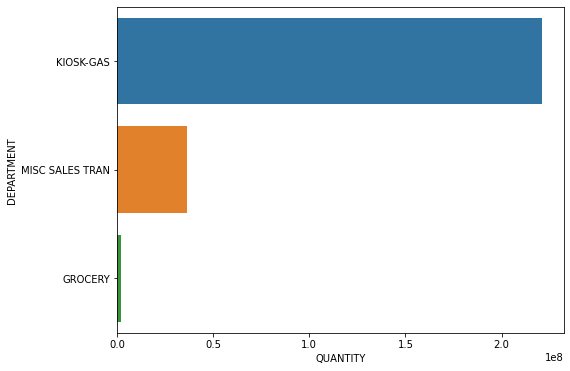

In [75]:
top_products_dept = mergeProduct_nos.head(3)
plt.figure(figsize=(8,6))
sns.barplot(y="DEPARTMENT",x="QUANTITY",data=top_products_dept,orient="h")
plt.show()

In [76]:
# Trying to figure out top departments which had made more money in two years(Based on sales value)

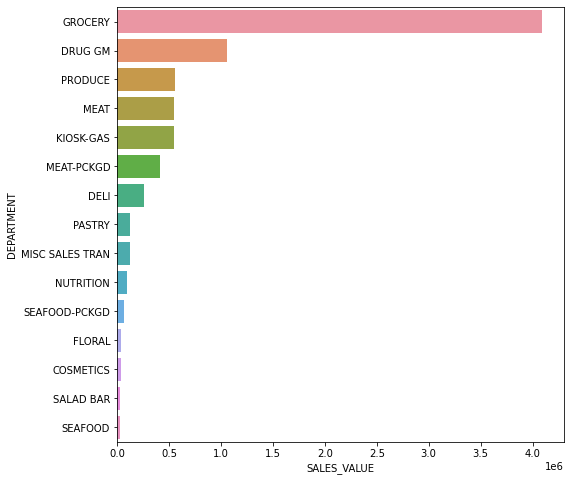

In [77]:
mergeProduct_sales = mergeProduct.groupby("DEPARTMENT").sum()["SALES_VALUE"].reset_index()
mergeProduct_sales.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_15_sales_dept = mergeProduct_sales.head(15)
plt.figure(figsize=(8,8))
sns.barplot(y="DEPARTMENT",x="SALES_VALUE",data=top_15_sales_dept,orient="h")
plt.show()

In [78]:
# From the EDA of merge dataset of transactional & product dataset grocery department had made more profit
# out of all the departements. 

In [79]:
# Trying to figure out top seller products of grocery department(based on sales value)

In [80]:
mergeProduct_grocery = mergeProduct.iloc[:,[5,14,16]]
mergeProduct_groceryy = mergeProduct_grocery.loc[mergeProduct_grocery['DEPARTMENT'] == 'GROCERY']
mergeProduct_grocery_dept = mergeProduct_groceryy.iloc[:,[0,2]]
pivotmergeProduct_grocery_dept = pd.pivot_table(mergeProduct_grocery_dept,index=['COMMODITY_DESC'],values=["SALES_VALUE"],aggfunc=np.sum)
pivotmergeProduct_grocery_dept.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_20_grocery = pivotmergeProduct_grocery_dept.head(10)
top_20_grocery

SALES_VALUE
COMMODITY_DESC                     
SOFT DRINKS               327647.30
FLUID MILK PRODUCTS       205356.05
CHEESE                    189528.18
FRZN MEAT/MEAT DINNERS    160517.17
BAG SNACKS                148375.16
BEERS/ALES                147309.68
FROZEN PIZZA              146037.25
BAKED BREAD/BUNS/ROLLS    145930.85
COLD CEREAL               111702.42
SOUP                       86239.69

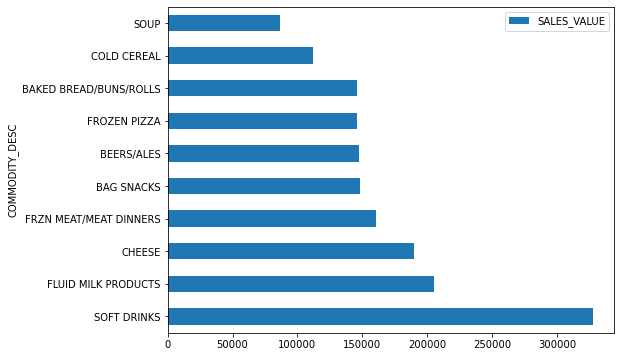

In [81]:
top_20_grocery.plot(figsize=(8,6),kind='barh', stacked=True);

In [82]:
# From the above analysis of Grocery department, mostly money was spend on Soft Drinks,Meat(Beef+Frozen+Chicken), 
# Milk Products, Beer, Bread, Frozen Pizza food items. 

In [83]:
# Trying to figure out top seller products of DRUG GM department(based on sales value)

In [84]:
mergeProduct_drug = mergeProduct.iloc[:,[5,14,16]]
mergeProduct_drug_dept = mergeProduct_drug.loc[mergeProduct_drug['DEPARTMENT']== 'DRUG GM']
mergeProduct_drug_deptt = mergeProduct_drug_dept.iloc[:,[0,2]]
pivotmergeProduct_dept_drug = pd.pivot_table(mergeProduct_drug_deptt,index=['COMMODITY_DESC'],values=["SALES_VALUE"],aggfunc=np.sum)
pivotmergeProduct_dept_drug.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_20_drug = pivotmergeProduct_dept_drug.head(10)
top_20_drug

SALES_VALUE
COMMODITY_DESC                             
CIGARETTES                         96387.83
CANDY - PACKAGED                   75868.82
DIAPERS & DISPOSABLES              59663.70
INFANT FORMULA                     50861.79
HAIR CARE PRODUCTS                 44840.52
ORAL HYGIENE PRODUCTS              36423.45
GREETING CARDS/WRAP/PARTY SPLY     33396.59
MAGAZINE                           32785.65
CANDY - CHECKLANE                  28116.66
COLD AND FLU                       25642.44

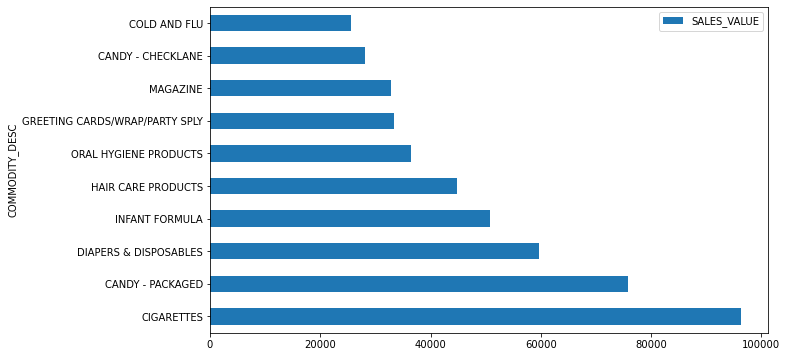

In [85]:
top_20_drug.plot(figsize=(10,6),kind='barh', stacked=True);

In [86]:
# Trying to figure out top seller products of PRODUCE department(based on sales value)

In [87]:
mergeProduct_produce = mergeProduct.iloc[:,[5,14,16]]
mergeProduct_produce_dept = mergeProduct_produce.loc[mergeProduct_produce['DEPARTMENT']== 'PRODUCE']
mergeProduct_produce_deptt = mergeProduct_produce_dept.iloc[:,[0,2]]
pivotmergeProduct_produce_deptt = pd.pivot_table(mergeProduct_produce_deptt,index=['COMMODITY_DESC'],values=["SALES_VALUE"],aggfunc=np.sum)
pivotmergeProduct_produce_deptt.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_20_produce = pivotmergeProduct_produce_deptt.head(20)


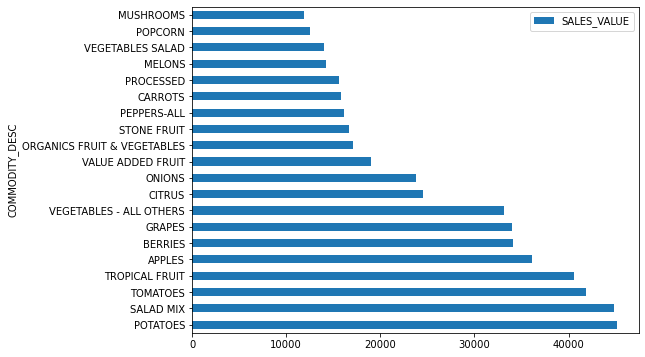

In [88]:
top_20_produce.plot(figsize=(8,6),kind='barh', stacked=True);

In [89]:
# Trying to figure out top seller products of MEAT department(based on sales value)

In [90]:
mergeProduct_meat = mergeProduct.iloc[:,[5,14,16]]
mergeProduct_meat_dept = mergeProduct_meat.loc[mergeProduct_meat['DEPARTMENT']== 'MEAT']
mergeProduct_meat_deptt = mergeProduct_meat_dept.iloc[:,[0,2]]
pivotmergeProduct_meat_deptt = pd.pivot_table(mergeProduct_meat_deptt,index=['COMMODITY_DESC'],values=["SALES_VALUE"],aggfunc=np.sum)
pivotmergeProduct_meat_deptt.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_5_meat = pivotmergeProduct_meat_deptt.head(5)
top_5_meat

SALES_VALUE
COMMODITY_DESC             
BEEF              312103.22
CHICKEN            94342.85
PORK               90263.36
SMOKED MEATS       27126.22
TURKEY             21258.67

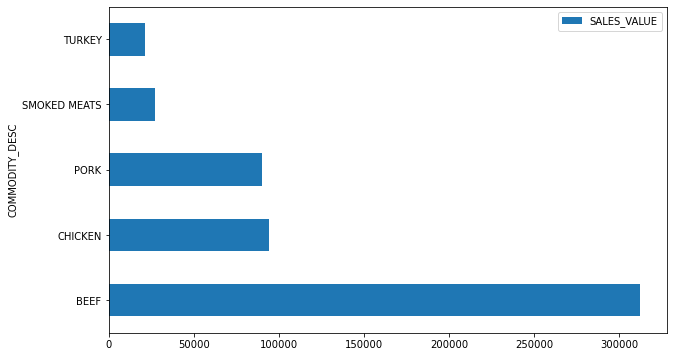

In [91]:
top_5_meat.plot(figsize=(10,6),kind='barh', stacked=True);

In [92]:
# Trying to figure out top seller products of KIOSK-GAS department(based on sales value)

In [93]:
mergeProduct_kiosk = mergeProduct.iloc[:,[5,14,16]]
mergeProduct_kiosk_dept = mergeProduct_kiosk.loc[mergeProduct_kiosk['DEPARTMENT']== 'KIOSK-GAS']
mergeProduct_kiosk_deptt = mergeProduct_kiosk_dept.iloc[:,[0,2]]
pivotmergeProduct_kiosk_deptt = pd.pivot_table(mergeProduct_kiosk_deptt,index=['COMMODITY_DESC'],values=["SALES_VALUE"],aggfunc=np.sum)
pivotmergeProduct_kiosk_deptt.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
top_5_kiosk = pivotmergeProduct_kiosk_deptt.head(5)
top_5_kiosk

SALES_VALUE
COMMODITY_DESC                
COUPON/MISC ITEMS    514685.72
FUEL                  29536.56

In [94]:
# Trying to figure out top selling products of MEAT-PCKGD department(based on sales value)

In [95]:
mergeProduct_meat_pckgd = mergeProduct.iloc[:,[5,14,16]]
mergeProduct_meat_pckgd_dept = mergeProduct_meat_pckgd.loc[mergeProduct_meat_pckgd['DEPARTMENT']== 'MEAT-PCKGD']
mergeProduct_meat_pckgd_deptt = mergeProduct_meat_pckgd_dept.iloc[:,[0,2]]
pivotmergeProduct_meat_pckgd_deptt = pd.pivot_table(mergeProduct_meat_pckgd_deptt,index=['COMMODITY_DESC'],values=["SALES_VALUE"],aggfunc=np.sum)
pivotmergeProduct_meat_pckgd_deptt.sort_values(by=['SALES_VALUE'], inplace=True,ascending=False)
#top_10_meat_pckgd = pivotmergeProduct_meat_pckgd_deptt.head(10)
top_10_meat_pckgd.plot(figsize=(10,6),kind='barh', stacked=True);

NameError: name 'top_10_meat_pckgd' is not defined

In [96]:
# Department wise trying to figure out most frequently purchased products (daily/weekly/monthly purchased products)

In [97]:
# Department : Produce 
mergeProduct_produce = mergeProduct.loc[mergeProduct['DEPARTMENT']== 'PRODUCE']
mergeProduct_produce_deppt = mergeProduct_produce.groupby("COMMODITY_DESC").sum()["QUANTITY"].reset_index()
mergeProduct_produce_deppt.sort_values(by=['QUANTITY'], inplace=True,ascending=False)
mergeProduct_produce_deppt.head(5)

COMMODITY_DESC  QUANTITY
27           TROPICAL FRUIT     39831
4                    CITRUS     26103
30  VEGETABLES - ALL OTHERS     25436
22                SALAD MIX     20383
18                 POTATOES     19074

In [98]:
# Department : Grocery
mergeProduct_grocery = mergeProduct.loc[mergeProduct['DEPARTMENT']== 'GROCERY']
mergeProduct_grocery_dept = mergeProduct_grocery.groupby("COMMODITY_DESC").sum()["QUANTITY"].reset_index()
mergeProduct_grocery_dept.sort_values(by=['QUANTITY'], inplace=True,ascending=False)
mergeProduct_grocery_dept.head(5)

COMMODITY_DESC  QUANTITY
84             SOFT DRINKS    160637
38     FLUID MILK PRODUCTS    116192
2   BAKED BREAD/BUNS/ROLLS     99713
17                  CHEESE     96402
85                    SOUP     85009

In [99]:
# Department : DRUG-GM
mergeProduct_druggm = mergeProduct.loc[mergeProduct['DEPARTMENT']== 'DRUG GM']
mergeProduct_druggm_dept = mergeProduct_druggm.groupby("COMMODITY_DESC").sum()["QUANTITY"].reset_index()
mergeProduct_druggm_dept.sort_values(by=['QUANTITY'], inplace=True,ascending=False)
mergeProduct_druggm_dept.head(5)

COMMODITY_DESC  QUANTITY
12               CANDY - CHECKLANE     57594
13                CANDY - PACKAGED     44580
6                       BABY FOODS     31337
16                      CIGARETTES     16842
44  GREETING CARDS/WRAP/PARTY SPLY     13671

In [100]:
# Department : KIOSK-GAS
mergeProduct_kisokgas = mergeProduct.loc[mergeProduct['DEPARTMENT']== 'KIOSK-GAS']
mergeProduct_kisokgas_dept = mergeProduct_kisokgas.groupby("COMMODITY_DESC").sum()["QUANTITY"].reset_index()
mergeProduct_kisokgas_dept.sort_values(by=['QUANTITY'], inplace=True,ascending=False)
mergeProduct_kisokgas_dept.head(5)

COMMODITY_DESC   QUANTITY
0  COUPON/MISC ITEMS  221135270
1               FUEL     119617

In [101]:
# Department : MEAT
mergeProduct_meatfresh = mergeProduct.loc[mergeProduct['DEPARTMENT']== 'MEAT']
mergeProduct_meatfresh_dept = mergeProduct_meatfresh.groupby("COMMODITY_DESC").sum()["QUANTITY"].reset_index()
mergeProduct_meatfresh_dept.sort_values(by=['QUANTITY'], inplace=True,ascending=False)
mergeProduct_meatfresh_dept.head(5)

COMMODITY_DESC  QUANTITY
2            BEEF     65576
3         CHICKEN     26042
10           PORK     18235
12   SMOKED MEATS      4554
13         TURKEY      3858

In [102]:
#****************************************Department : PRODUCE ************************************************

In [103]:
# Trying to analyze demand for maximum purchased products of Produce department weekly/monthly basis 

#COMMODITY_DESC	QUANTITY
#TROPICAL FRUIT	39831
#CITRUS	26103
#VEGETABLES - ALL OTHERS	25436
#SALAD MIX	20383

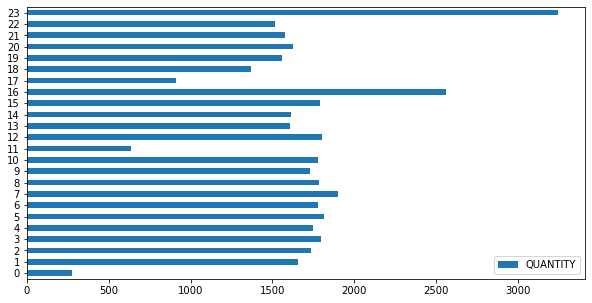

In [104]:
# Analyzing purchase rate of TROPICAL FRUIT weekly/montly basis 
mergeProduct_produce_tropical = mergeProduct_produce.loc[mergeProduct_produce['COMMODITY_DESC']== 'TROPICAL FRUIT']
mergeProduct_produce_tropical_fruit = mergeProduct_produce_tropical.groupby("Month").sum()["QUANTITY"].reset_index()
mergeProduct_produce_tropical_fruit.plot(figsize=(10,5),kind='barh', stacked=True);

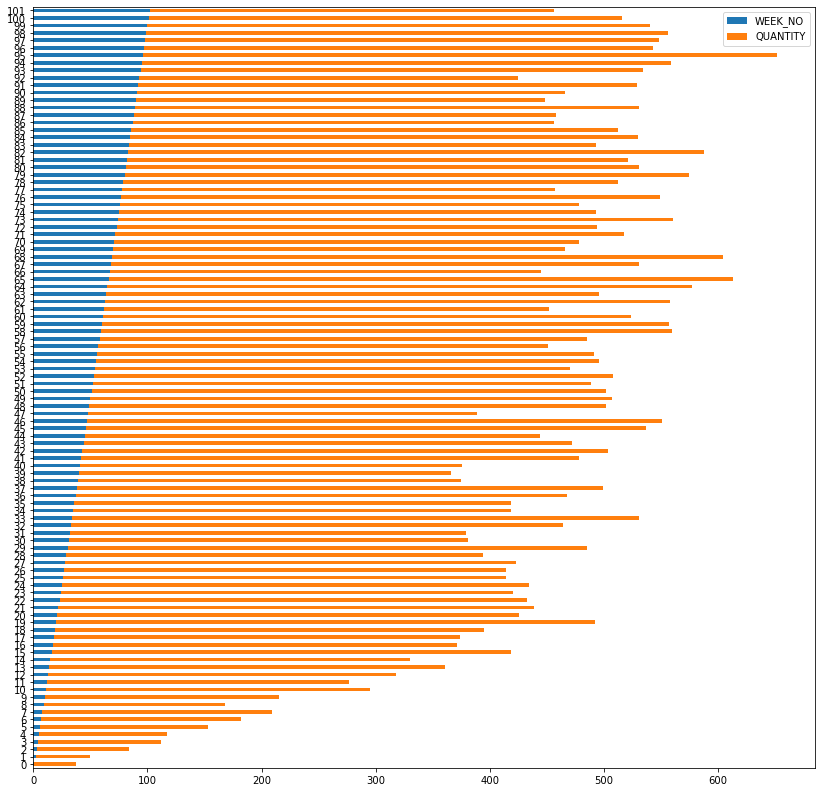

In [105]:
mergeProduct_produce_tropical_fruit = mergeProduct_produce_tropical.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_produce_tropical_fruit.plot(figsize=(14,14),kind='barh', stacked=True);

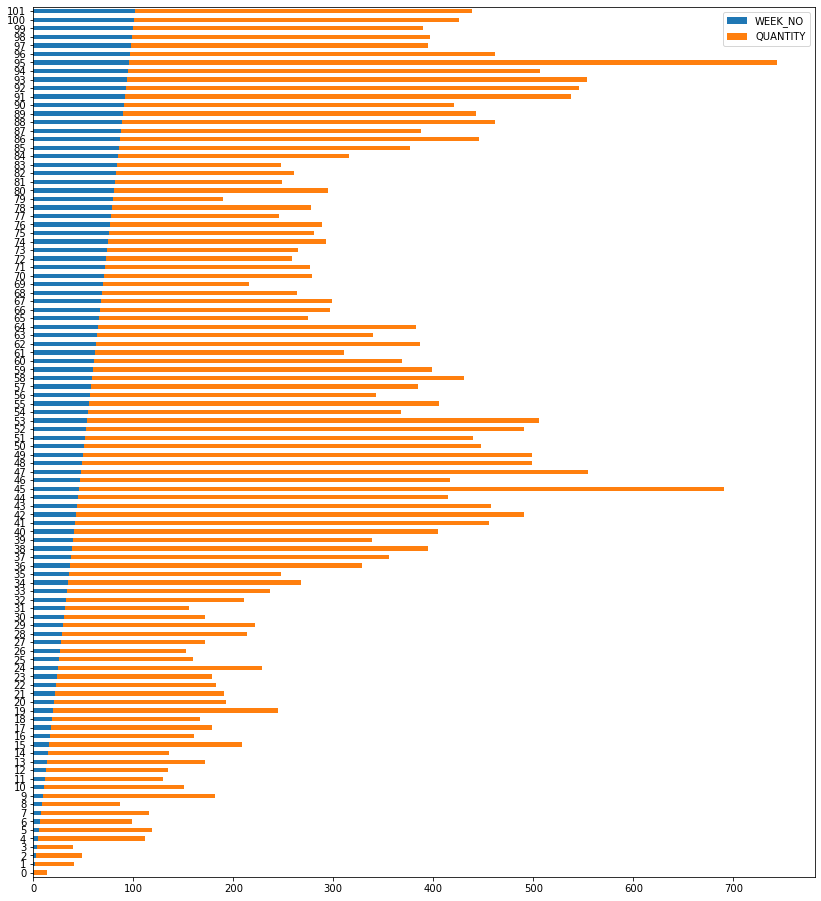

In [106]:
# Analyzing purchase rate of Citrus weekly/montly basis 
mergeProduct_produce_citrus = mergeProduct_produce.loc[mergeProduct_produce['COMMODITY_DESC']== 'CITRUS']
mergeProduct_produce_ccitrus = mergeProduct_produce_citrus.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_produce_ccitrus.plot(figsize=(14,16),kind='barh', stacked=True);

In [107]:
#****************************************Department : GROCERY ************************************************

In [108]:
# Trying to analyze demand for maximum purchased products of Grocery department weekly/monthly basis 

#COMMODITY_DESC	QUANTITY
#SOFT DRINKS	160637
#FLUID MILK PRODUCTS	116192
#BAKED BREAD/BUNS/ROLLS	99713
#CHEESE	96402
#SOUP	85009
#BAG SNACKS	80824


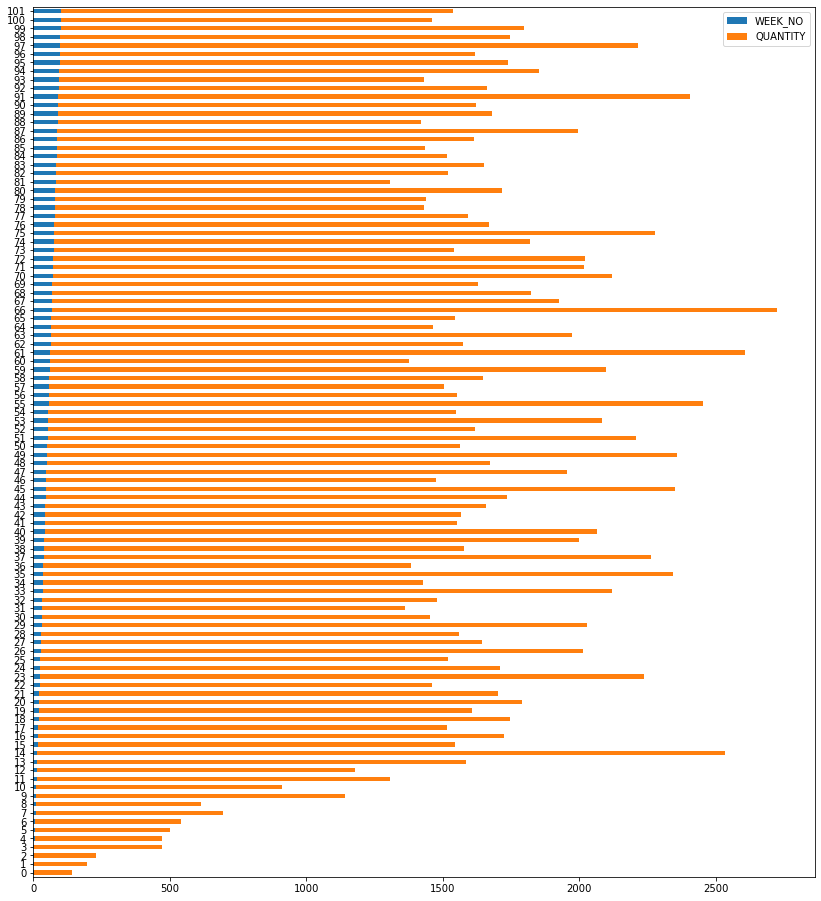

In [109]:
# Analyzing purchase rate of Soft Drinks weekly/montly basis 
mergeProduct_grocery_softdrinks = mergeProduct_grocery.loc[mergeProduct_grocery['COMMODITY_DESC']== 'SOFT DRINKS']
mergeProduct_grocery_softdrinks_dept = mergeProduct_grocery_softdrinks.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_grocery_softdrinks_dept.plot(figsize=(14,16),kind='barh', stacked=True);

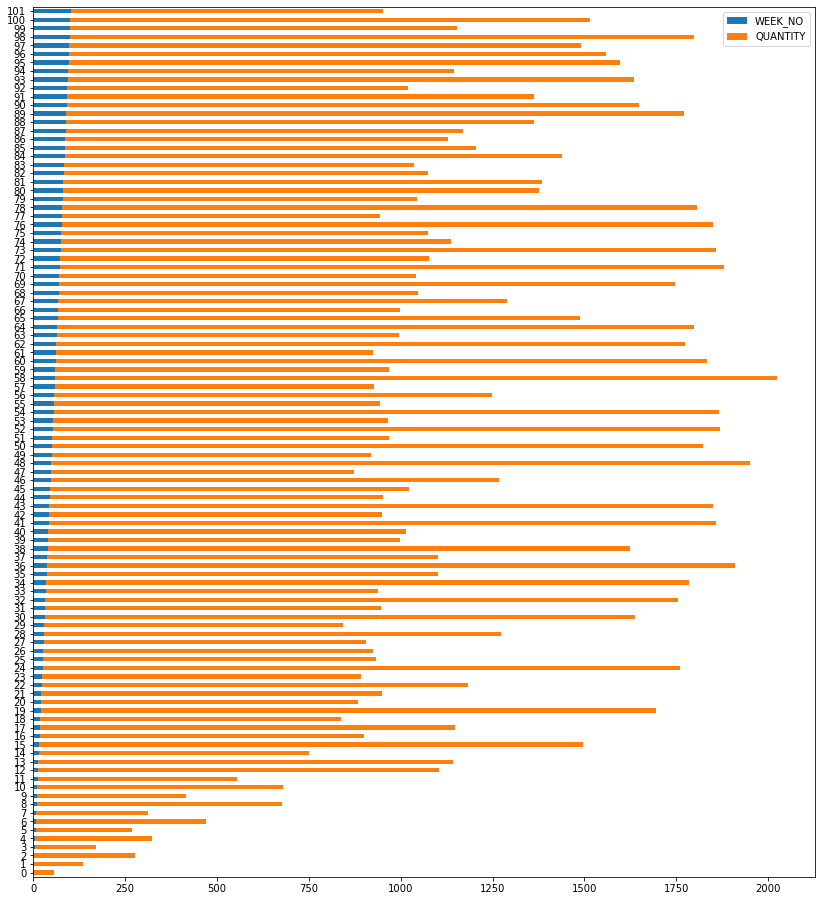

In [110]:
# Analyzing purchase rate of FLUID MILK PRODUCTS weekly/montly basis 
mergeProduct_grocery_fluidmilk = mergeProduct_grocery.loc[mergeProduct_grocery['COMMODITY_DESC']== 'FLUID MILK PRODUCTS']
mergeProduct_grocery_fluidmilk_dept = mergeProduct_grocery_fluidmilk.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_grocery_fluidmilk_dept.plot(figsize=(14,16),kind='barh', stacked=True);

In [111]:
# Analyzing purchase rate of BAKED BREAD/BUNS/ROLLS weekly/montly basis 

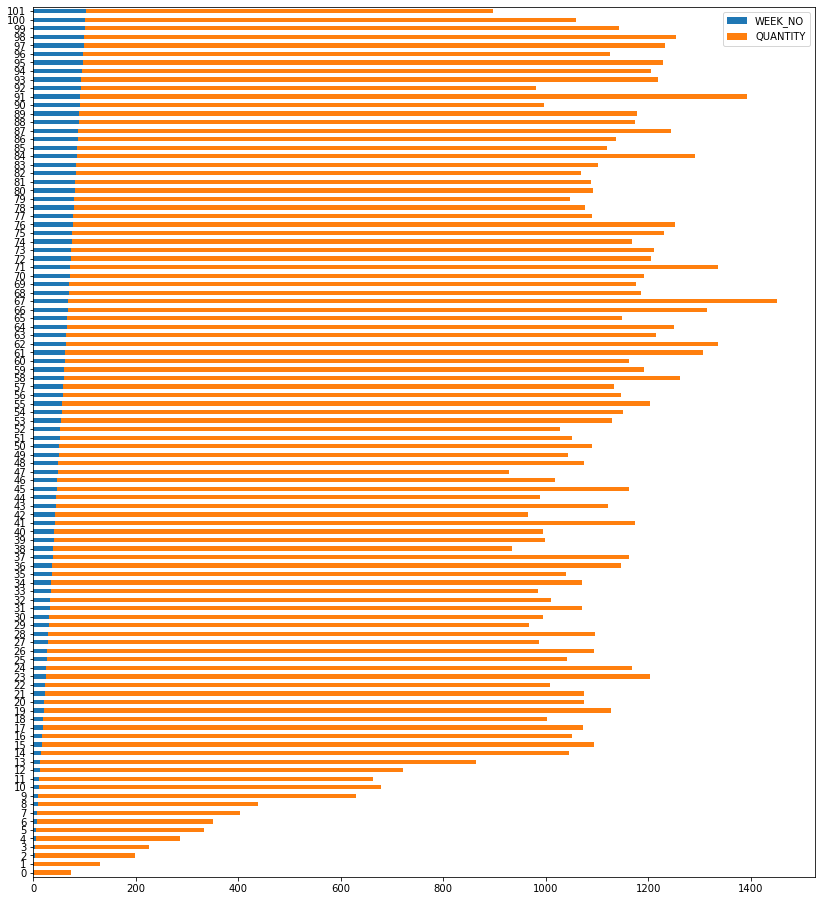

In [112]:
mergeProduct_grocery_bread = mergeProduct_grocery.loc[mergeProduct_grocery['COMMODITY_DESC']== 'BAKED BREAD/BUNS/ROLLS']
mergeProduct_grocery_bread_dept = mergeProduct_grocery_bread.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_grocery_bread_dept.plot(figsize=(14,16),kind='barh', stacked=True);

In [113]:
#****************************************Department : DRUG GM ************************************************

In [114]:
# Trying to analyze demand for maximum purchased products of Grocery department weekly/monthly basis 

#COMMODITY_DESC	QUANTITY
#CANDY - CHECKLANE	57594
#CANDY - PACKAGED	44580
#BABY FOODS	31337
#CIGARETTES	16842

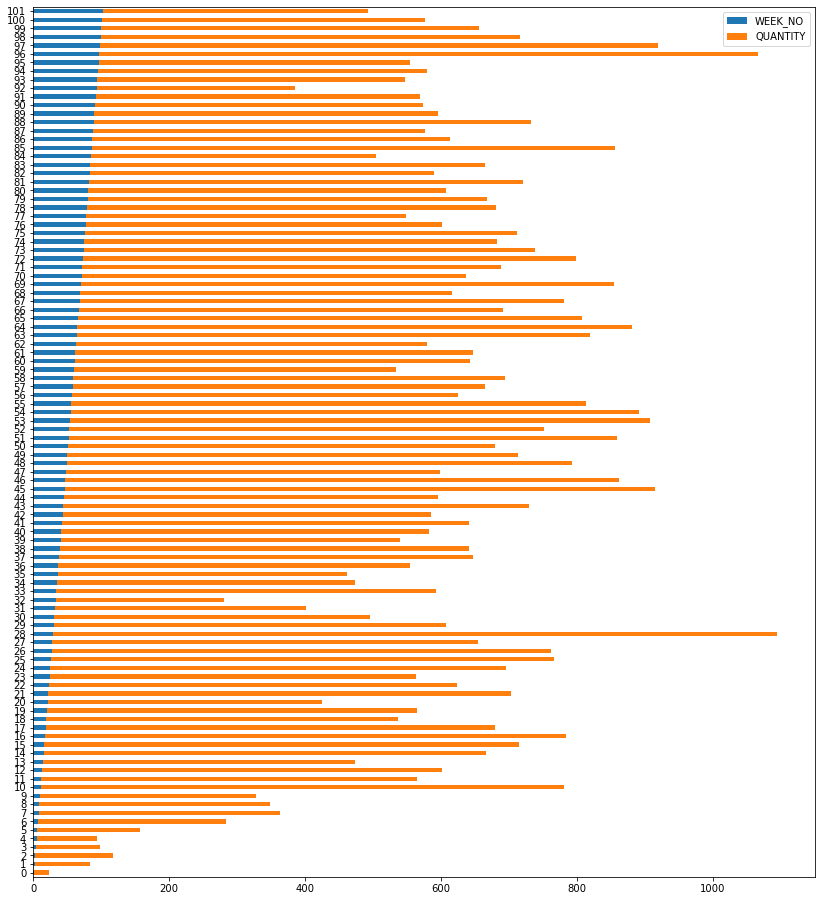

In [115]:
# Analyzing purchase rate of CANDY weekly/montly basis 
mergeProduct_druggm_candy = mergeProduct_druggm.loc[mergeProduct_druggm['COMMODITY_DESC']== 'CANDY - CHECKLANE']
mergeProduct_druggm_candy_dept = mergeProduct_druggm_candy.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_druggm_candy_dept.plot(figsize=(14,16),kind='barh', stacked=True);

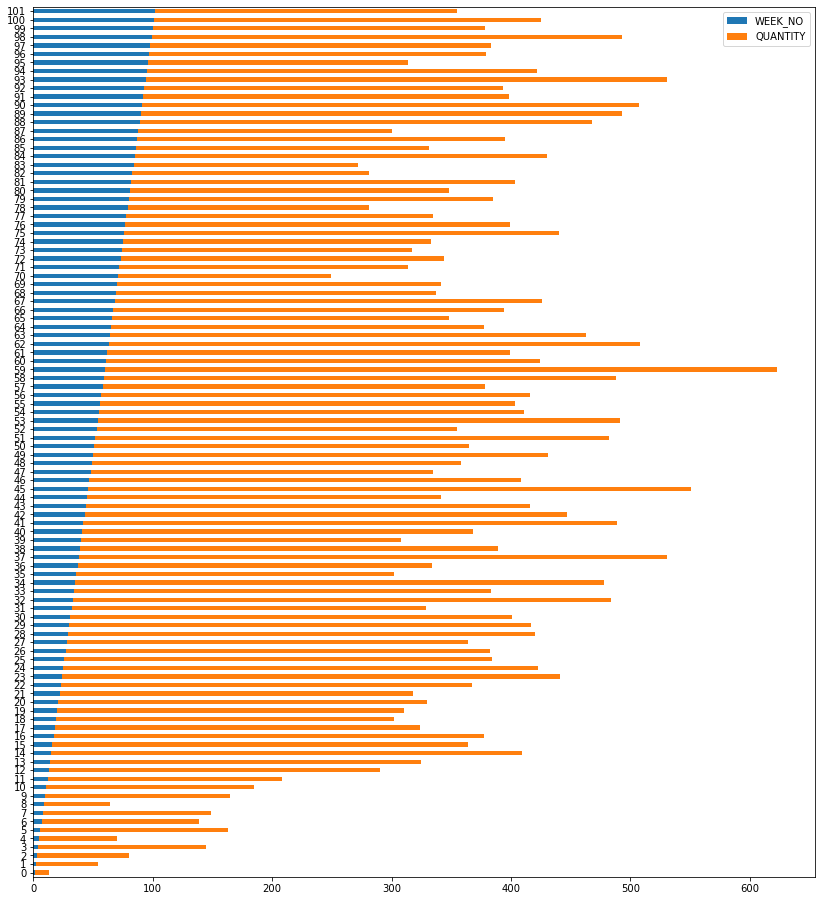

In [116]:
# Analyzing purchase rate of BABY FOOD weekly/montly basis 
mergeProduct_druggm_babyfood = mergeProduct_druggm.loc[mergeProduct_druggm['COMMODITY_DESC']== 'BABY FOODS']
mergeProduct_druggm_babyfood_dept = mergeProduct_druggm_babyfood.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_druggm_babyfood_dept.plot(figsize=(14,16),kind='barh', stacked=True);

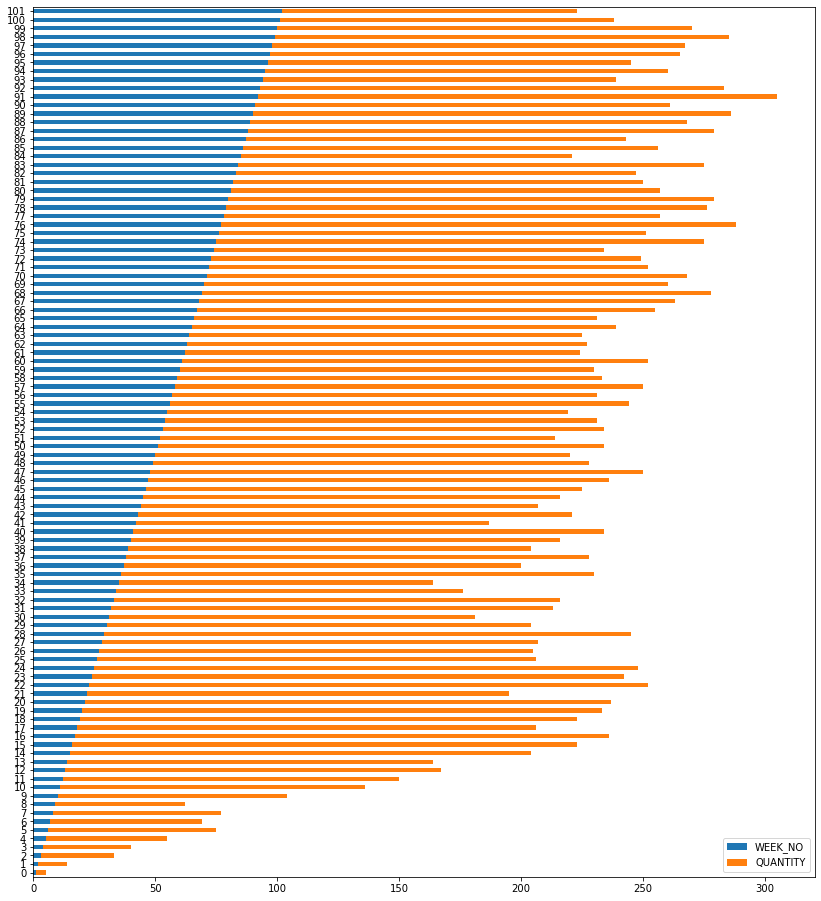

In [117]:
# Analyzing purchase rate of CIGARETTES weekly/montly basis 

mergeProduct_druggm_CIGARETTES = mergeProduct_druggm.loc[mergeProduct_druggm['COMMODITY_DESC']== 'CIGARETTES']
mergeProduct_druggm_CIGARETTES_dept = mergeProduct_druggm_CIGARETTES.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_druggm_CIGARETTES_dept.plot(figsize=(14,16),kind='barh', stacked=True);

In [118]:
#****************************************Department : MEAT ************************************************

# Trying to analyze demand for maximum purchased products of MEAT department weekly/monthly basis 

#COMMODITY_DESC	QUANTITY
#BEEF	65576
#CHICKEN	26042
#PORK	18235
#SMOKED MEATS	4554
#TURKEY	3858

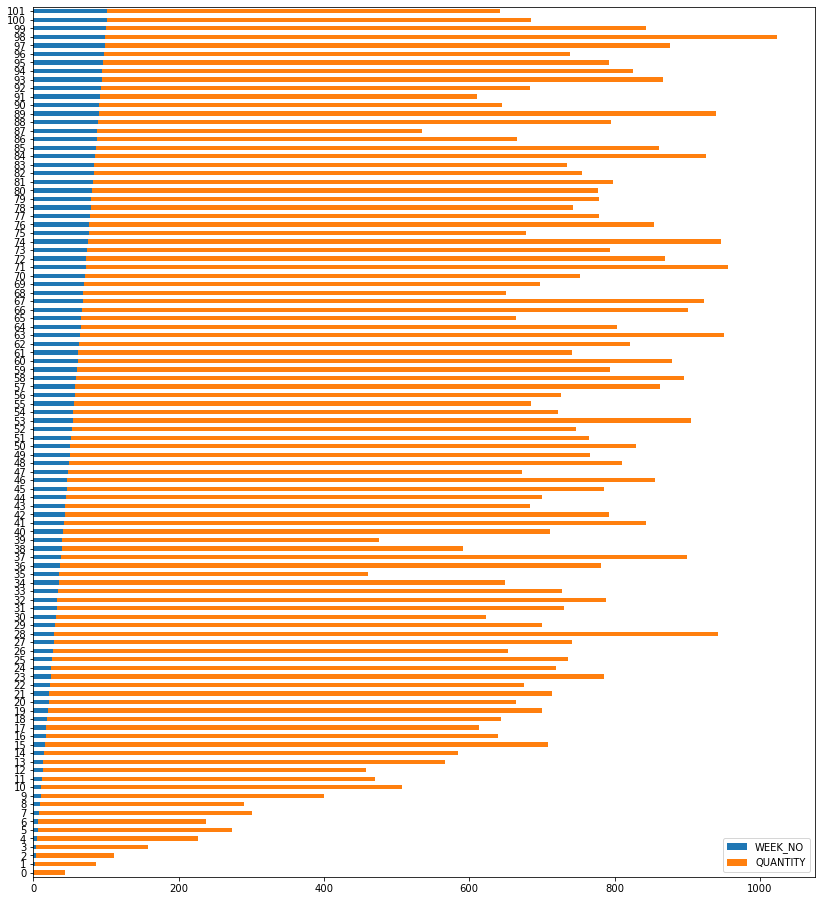

In [119]:
# Analyzing purchase rate of BEEF weekly/montly basis 
mergeProduct_MEATfresh_BEEF = mergeProduct_meatfresh.loc[mergeProduct_meatfresh['COMMODITY_DESC']== 'BEEF']
mergeProduct_MEATfresh_BEEF_dept = mergeProduct_MEATfresh_BEEF.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_MEATfresh_BEEF_dept.plot(figsize=(14,16),kind='barh', stacked=True);

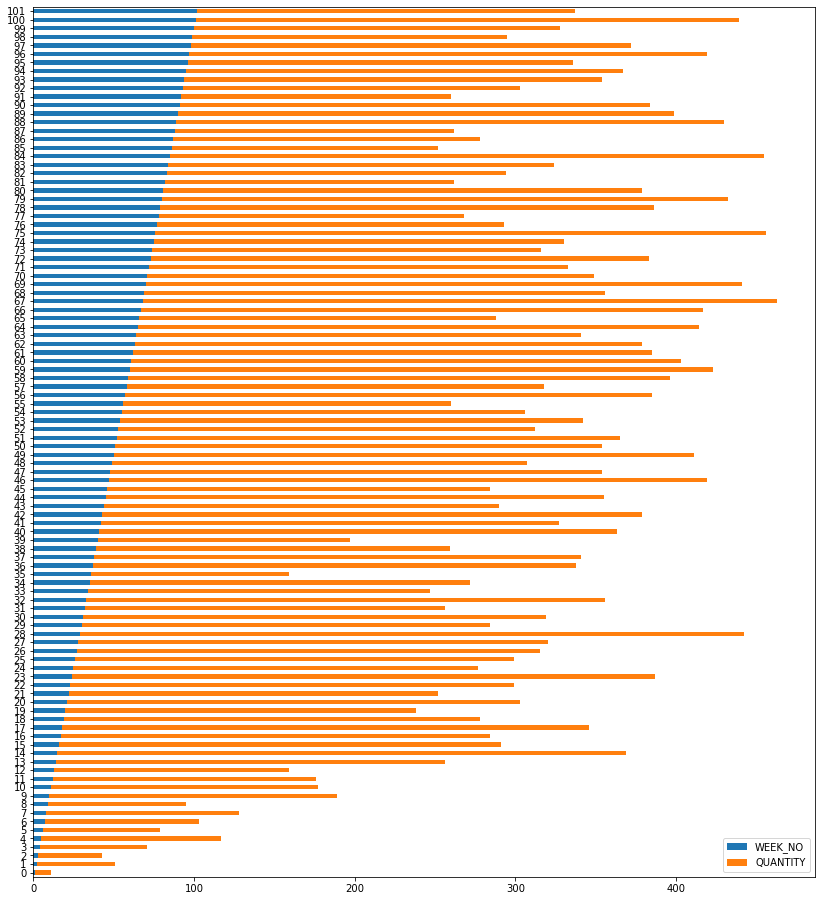

In [120]:
# Analyzing purchase rate of CHICKEN weekly/monthly basis 
mergeProduct_MEATfresh_CHICKEN = mergeProduct_meatfresh.loc[mergeProduct_meatfresh['COMMODITY_DESC']== 'CHICKEN']
mergeProduct_MEATfresh_CHICKEN_dept = mergeProduct_MEATfresh_CHICKEN.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_MEATfresh_CHICKEN_dept.plot(figsize=(14,16),kind='barh', stacked=True);

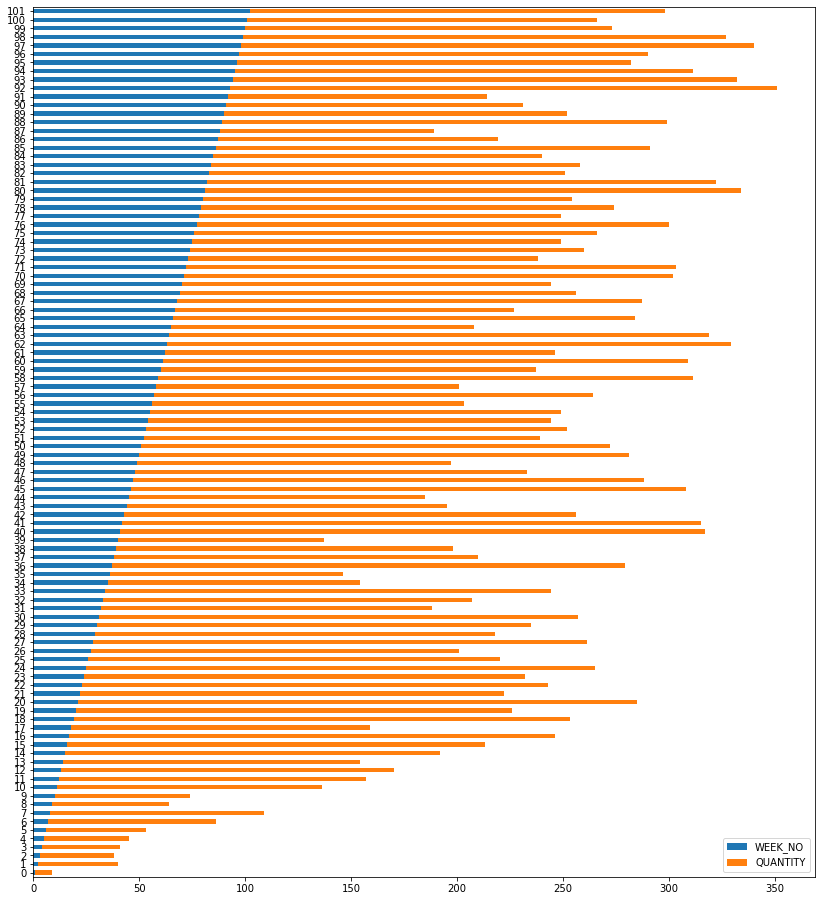

In [121]:
# Analyzing purchase rate of PORK weekly/monthly basis 
mergeProduct_MEATfresh_PORK = mergeProduct_meatfresh.loc[mergeProduct_meatfresh['COMMODITY_DESC']== 'PORK']
mergeProduct_MEATfresh_PORK_dept = mergeProduct_MEATfresh_PORK.groupby("WEEK_NO").sum()["QUANTITY"].reset_index()
mergeProduct_MEATfresh_PORK_dept.plot(figsize=(14,16),kind='barh', stacked=True);

In [122]:
#Analysis for mostly purchased products of the retailer Weekly/monthly basis: 

#Department : Produce 

#COMMODITY_DESC	QUANTITY(Weekly approx)
#TROPICAL FRUIT	350 - 500
#CITRUS	250 - 400

#Department : Grocery

#COMMODITY_DESC	QUANTITY(Weekly approx)
#SOFT DRINKS	1200 - 2500
#FLUID MILK PRODUCTS	800 - 2000
#BAKED BREAD/BUNS/ROLLS	800 - 1200

#Department : Drug GM 

#COMMODITY_DESC	QUANTITY(Weekly approx)
#CANDY - CHECKLANE	500 - 1000 
#BABY FOODS	200 - 400 
#CIGARETTES	100 - 200 

#COMMODITY_DESC	QUANTITY(Weekly approx)
#BEEF	500 - 900
#CHICKEN	200 - 350 
#PORK	150 - 250 

In [123]:
################################# EDA of Product dataset ########################################

#Most No of products sold by the departments :

#DEPARTMENT	QUANTITY
#KIOSK-GAS	221254887
#MISC SALES TRAN	36080860
#GROCERY	2194762
#DRUG GM	353844
#PRODUCE	319993
#MEAT-PCKGD	148148
#MEAT	119113

#Most profitable departments of the retailer in two years(Considering sales value): 

#DEPARTMENT	SALES_VALUE
#GROCERY	4.09E+06
#DRUG GM	1.06E+06
#PRODUCE	5.57E+05
#MEAT	5.49E+05
#KIOSK-GAS	5.44E+05
#MEAT-PCKGD	4.12E+05
#DELI	2.61E+05

#Top few products of most profitable departments in two years(Considering sales value): 

#GROCERY : 

#COMMODITY_DESC	SALES_VALUE
#SOFT DRINKS	327647.3
#FLUID MILK PRODUCTS	205356.05
#CHEESE	189528.18
#FRZN MEAT/MEAT DINNERS	160517.17
#BAG SNACKS	148375.16

#DRUG GM : 

#COMMODITY_DESC	SALES_VALUE
#CIGARETTES	96387.83
#CANDY - PACKAGED	75868.82
#DIAPERS & DISPOSABLES	59663.7
#INFANT FORMULA	50861.79
#HAIR CARE PRODUCTS	44840.52

#PRODUCE : 

#COMMODITY_DESC	SALES_VALUE
#POTATOES	45169.62
#SALAD MIX	44807.03
#TOMATOES	41861.79
#TROPICAL FRUIT	40551.23
#APPLES	36160.75
#BERRIES	34142.31

#MEAT : 

#COMMODITY_DESC	SALES_VALUE
#BEEF	312103.22
#CHICKEN	94342.85
#PORK	90263.36
#SMOKED MEATS	27126.22
#TURKEY	21258.67

#KIOSK-GAS : 

#COMMODITY_DESC	SALES_VALUE
#COUPON/MISC ITEMS	514685.72
#FUEL	29536.56

###########################################################################################################

#Analysis for mostly purchased products of the retailer Weekly/monthly basis: 

#Department : Produce 

#COMMODITY_DESC	QUANTITY(Weekly approx)
#TROPICAL FRUIT	350 - 500
#CITRUS	250 - 400

#Department : Grocery

#COMMODITY_DESC	QUANTITY(Weekly approx)
#SOFT DRINKS	1200 - 2500
#FLUID MILK PRODUCTS	800 - 2000
#BAKED BREAD/BUNS/ROLLS	800 - 1200

#Department : Drug GM 

#COMMODITY_DESC	QUANTITY(Weekly approx)
#CANDY - CHECKLANE	500 - 1000 
#BABY FOODS	200 - 400 
#CIGARETTES	100 - 200 

#COMMODITY_DESC	QUANTITY(Weekly approx)
#BEEF	500 - 900
#CHICKEN	200 - 350 
#PORK	150 - 250 


In [124]:
############################# Proceeding for clustering prerequisites #############################################

In [125]:
#Converting week to year for clustering

Trandata['Year'] = Trandata.WEEK_NO.apply(lambda x: '1' if x < 53 else '2')
Trandata.head()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  \
0       364        -0.60        1631        1          0.0                0.0   
1       364         0.00        1631        1          0.0                0.0   
2       364        -0.30        1631        1          0.0                0.0   
3       364         0.00        1631        1          0.0                0.0   
4       364        -0.39        1631        1          0.0                0.0   

  Year  
0    1  
1    1  
2    1  
3    1  
4    1

In [126]:
Trandata.tail()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
2595727      3228         0.00        1520      102          0.0   
2595728      3228         0.00        1520      102          0.0   
2595729      3228         0.00        1520      102          0.0   
2595730      3228        -0.49        1520      102          0.0   
2595731      3228         0.00        1520      102          0.0   

         COUPON_MATCH_DISC Year  
2595727                0.0    2  
2595728                0.0    2  
2595729                0.0    2  
2595730                0.0    2  
2595731                0.0    2

In [127]:
# EDA of Transactional dataset & Demography dataset using pandas profiling

#from pandas_profiling import ProfileReport

#Trandataprofile = pandas_profiling.ProfileReport(Trandata)
##Trandataprofile.to_notebook_iframe()
#Trandataprofile.to_file("Trandataprofile.html")

#dataprofile = pandas_profiling.ProfileReport(Demodata)
##Demodataprofile.to_notebook_iframe()
#Demodataprofile.to_file("Demodataprofile.html")

In [128]:
# Checking Missing values values in Transactional Data
Trandata.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
Year                 0
dtype: int64

In [129]:
# Checking Missing values values in demographic data
Demodata.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

In [130]:
# Analysis of Sales value according to year on Transactional dataset

pivottran = pd.pivot_table(Trandata,index=['household_key','Year'],values=["SALES_VALUE"],aggfunc=np.sum)
pivottran.head(100)

SALES_VALUE
household_key Year             
1             1         2011.66
              2         2318.50
2             1          990.19
              2          964.15
3             1         2014.03
...                         ...
48            2          908.27
49            1         2291.09
              2         4153.94
50            1          136.96
              2          214.43

[100 rows x 1 columns]

In [131]:
pivottranFF = pivottran.unstack()

In [132]:
#Replacing Null values 

pivottranFF.SALES_VALUE.fillna(0 ,inplace=True)

In [133]:
pivottranFF

SALES_VALUE         
Year                    1        2
household_key                     
1                 2011.66  2318.50
2                  990.19   964.15
3                 2014.03   639.18
4                  980.21   219.90
5                  505.59   273.47
...                   ...      ...
2496              1743.10  2596.56
2497              3159.82  3952.16
2498               893.60  1708.00
2499              1050.47  2343.60
2500              1736.13  3750.03

[2500 rows x 2 columns]

In [134]:
# Joining of Demography data & transactional dataset

mergedata = pd.merge(Demodata,pivottranFF,on="household_key",how="left")


In [135]:
mergedata

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0        65+                   A      35-49K      Homeowner  2 Adults No Kids   
1      45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2      25-34                   U      25-34K        Unknown     2 Adults Kids   
3      25-34                   U      75-99K      Homeowner     2 Adults Kids   
4      45-54                   B      50-74K      Homeowner     Single Female   
..       ...                 ...         ...            ...               ...   
796    35-44                   U      50-74K      Homeowner  2 Adults No Kids   
797    45-54                   A      75-99K      Homeowner           Unknown   
798    45-54                   U      35-49K        Unknown       Single Male   
799    25-34                   U      50-74K      Homeowner  2 Adults No Kids   
800    25-34                   U   Under 15K        Unknown     2 Adults Kids   

    HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  (SALES_VALUE, 1)  \
0                     2      None/Unknown              1           2011.66   
1                     2      None/Unknown              7            879.31   
2                     3                 1              8           2332.29   
3                     4                 2             13           5649.63   
4                     1      None/Unknown             16           1134.99   
..                  ...               ...            ...               ...   
796                   2      None/Unknown           2494            925.51   
797                   3                 1           2496           1743.10   
798                   1      None/Unknown           2497           3159.82   
799                   2      None/Unknown           2498            893.60   
800                   3                 1           2499           1050.47   

     (SALES_VALUE, 2)  
0             2318.50  
1             2520.74  
2             3202.68  
3             7541.29  
4              377.03  
..                ...  
796           1195.42  
797           2596.56  
798           3952.16  
799           1708.00  
800           2343.60  

[801 rows x 10 columns]

In [136]:
# Dealing with categorical columns of mergedataset(Transactional + Demography)

mergedata = mergedata.drop(['household_key'], axis=1)

In [137]:

# Replacing 'Unknown' values of HOMEOWNER_DESC with Homeowner

mergedata.HOMEOWNER_DESC.replace(['Unknown'],['Homeowner'], inplace=True)

# Replacing 'Unknown' values of HH_COMP_DESC with Single Male

mergedata.HH_COMP_DESC.replace(['Unknown'],['Single Male'], inplace=True)

# Replacing 5+ values of HOUSEHOLD_SIZE_DESC with 5 

mergedata.HOUSEHOLD_SIZE_DESC.replace(['5+'],['5'], inplace=True)

# Replacing Age 65+ of AGE_DESC column with 65 

mergedata.AGE_DESC.replace(['65+'],['65'], inplace=True)

In [138]:
obj_cols = ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC']

In [139]:
mergedata_ohe = pd.get_dummies(mergedata,drop_first=True)

In [140]:
##Label encoding
from sklearn import preprocessing
mergedata_le = mergedata.copy()
lb = preprocessing.LabelEncoder()
for col in obj_cols :
    mergedata_le[col] = lb.fit_transform(mergedata_le[col])
mergedata_le.head()

AGE_DESC  MARITAL_STATUS_CODE  INCOME_DESC  HOMEOWNER_DESC  HH_COMP_DESC  \
0         5                    0            8               0             2   
1         3                    0            9               0             2   
2         1                    2            6               0             1   
3         1                    2           10               0             1   
4         3                    1            9               0             3   

  HOUSEHOLD_SIZE_DESC  KID_CATEGORY_DESC  (SALES_VALUE, 1)  (SALES_VALUE, 2)  
0                   2                  3           2011.66           2318.50  
1                   2                  3            879.31           2520.74  
2                   3                  0           2332.29           3202.68  
3                   4                  1           5649.63           7541.29  
4                   1                  3           1134.99            377.03

In [141]:
mergedata_le.head()

AGE_DESC  MARITAL_STATUS_CODE  INCOME_DESC  HOMEOWNER_DESC  HH_COMP_DESC  \
0         5                    0            8               0             2   
1         3                    0            9               0             2   
2         1                    2            6               0             1   
3         1                    2           10               0             1   
4         3                    1            9               0             3   

  HOUSEHOLD_SIZE_DESC  KID_CATEGORY_DESC  (SALES_VALUE, 1)  (SALES_VALUE, 2)  
0                   2                  3           2011.66           2318.50  
1                   2                  3            879.31           2520.74  
2                   3                  0           2332.29           3202.68  
3                   4                  1           5649.63           7541.29  
4                   1                  3           1134.99            377.03

In [142]:
mergedata_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             801 non-null    int32  
 1   MARITAL_STATUS_CODE  801 non-null    int32  
 2   INCOME_DESC          801 non-null    int32  
 3   HOMEOWNER_DESC       801 non-null    int32  
 4   HH_COMP_DESC         801 non-null    int32  
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object 
 6   KID_CATEGORY_DESC    801 non-null    int32  
 7   (SALES_VALUE, 1)     801 non-null    float64
 8   (SALES_VALUE, 2)     801 non-null    float64
dtypes: float64(2), int32(6), object(1)
memory usage: 43.8+ KB


In [143]:
# Perform Standarization on dataframe ( Deography + Transactional )

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
mergedata_le_scaled2 = pd.DataFrame(sc.fit_transform(mergedata_le),columns = mergedata_le.columns)

In [145]:
mergedata_le_scaled2.head()

AGE_DESC  MARITAL_STATUS_CODE  INCOME_DESC  HOMEOWNER_DESC  HH_COMP_DESC  \
0  1.967044            -1.087572     0.305269       -0.280396     -0.208107   
1  0.403171            -1.087572     0.615180       -0.280396     -0.208107   
2 -1.160702             1.076764    -0.314555       -0.280396     -1.045765   
3 -1.160702             1.076764     0.925092       -0.280396     -1.045765   
4  0.403171            -0.005404     0.615180       -0.280396      0.629551   

   HOUSEHOLD_SIZE_DESC  KID_CATEGORY_DESC  (SALES_VALUE, 1)  (SALES_VALUE, 2)  
0            -0.165429           0.598417         -0.241055         -0.393344  
1            -0.165429           0.598417         -0.860944         -0.299161  
2             0.673232          -2.109674         -0.065531          0.018418  
3             1.511892          -1.206977          1.750501          2.038903  
4            -1.004089           0.598417         -0.720976         -1.297484

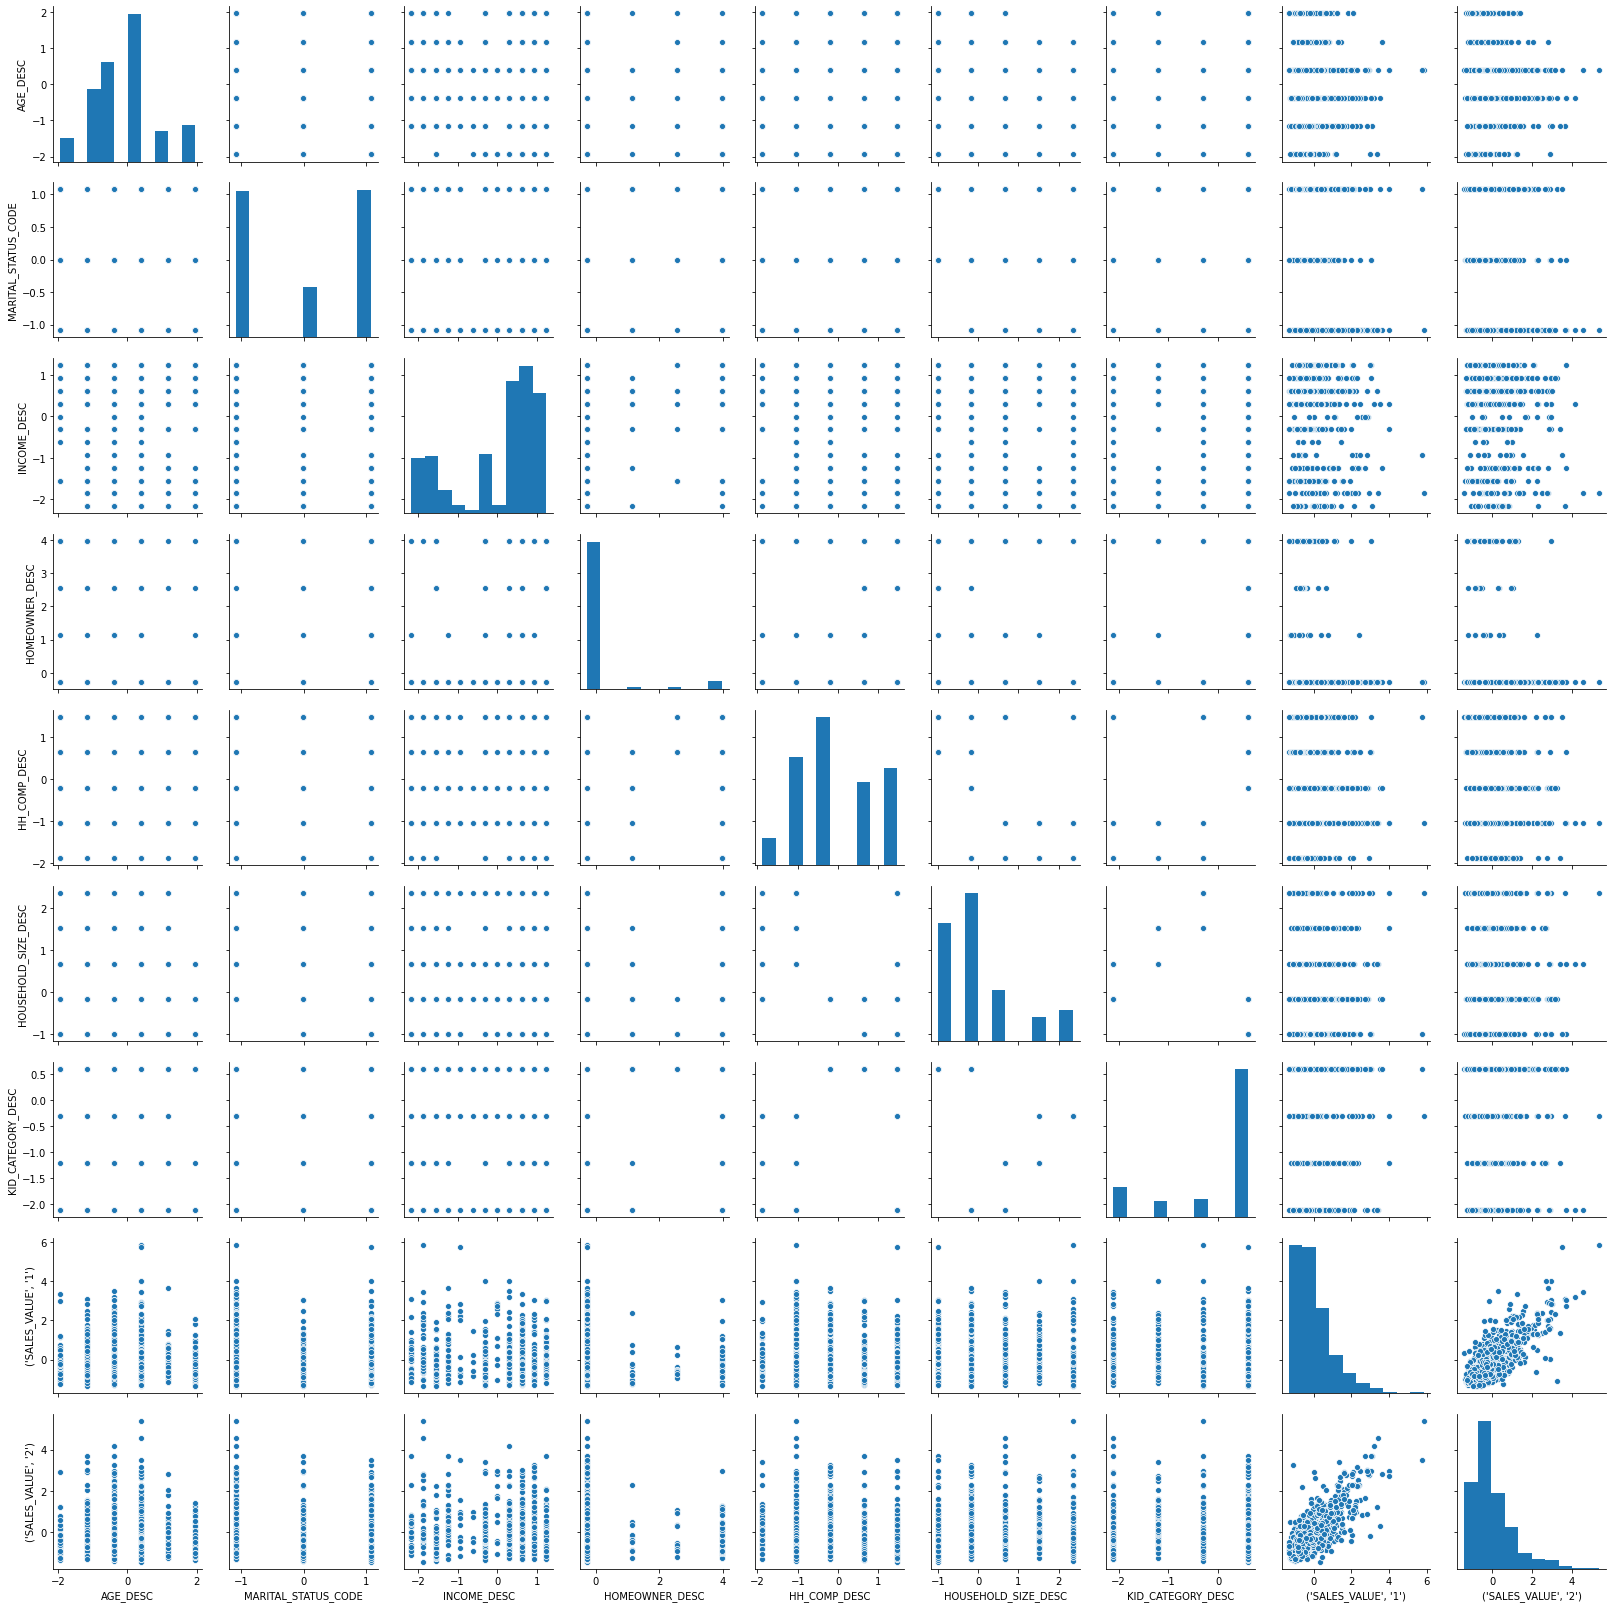

In [146]:
sns.pairplot(mergedata_le_scaled2)

In [147]:
#Assumtion based on Visual EDA
# 1. There might be relationship between Sales value of both the years(First yr + Second Yr) and income description (n_groups: ? )
# 2. There might be relationship between Sales value of both the years(First yr + Second Yr) and age of the customers(n_groups: ? )
# 3. There might be relationship between Sales value of both the years(First yr + Second Yr) and HOMEOWNER_DESC of the customers(n_groups: ? )
# 4. There might be relationship between Sales value of both the years(First yr + Second Yr) and MARITAL_STATUS of the customers(n_groups: ? )
# 5. There might be relationship between Sales value of both the years(First yr + Second Yr) and HH_COMP_DESC(Family Details) of the customers(n_groups: ? )

In [148]:
# Assumption : 1 
# Proceeding analysis with First Assumption ( Trying K means clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) &
# income description (n_groups: ? )

In [149]:
# Considering Yr1 on dataframe ( Deography + Transactional )

In [150]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score

In [151]:
features_yr1 = mergedata_le_scaled2.iloc[:,[2,7]].values

In [152]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.5343373340274767


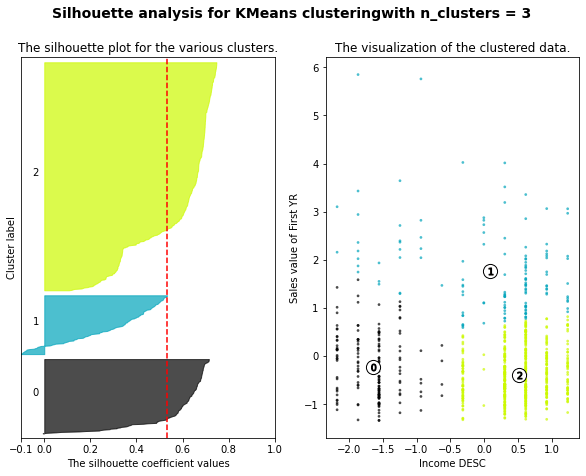

For n_clusters = 4 The average silhouette_score is : 0.4926572188735436


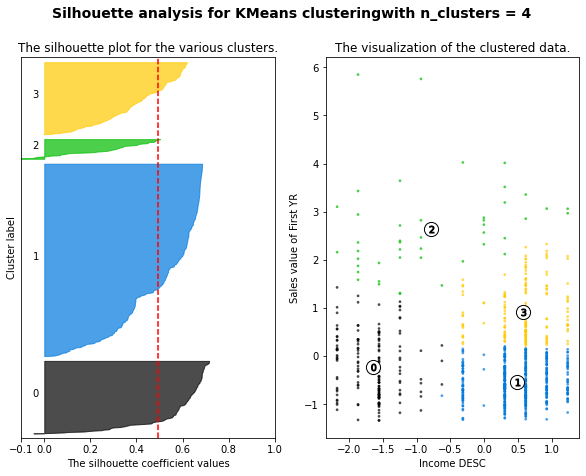

For n_clusters = 5 The average silhouette_score is : 0.43066173206890385


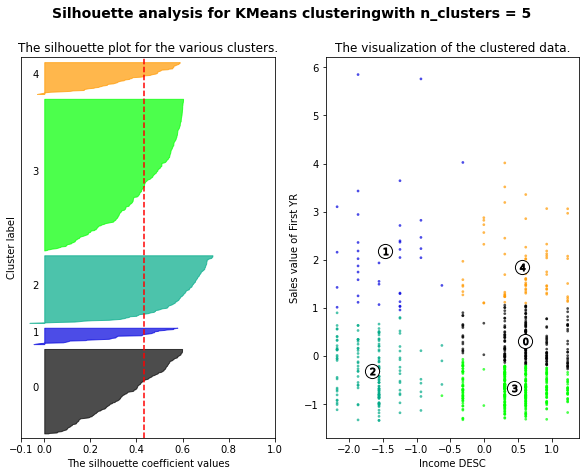

For n_clusters = 6 The average silhouette_score is : 0.392172826903866


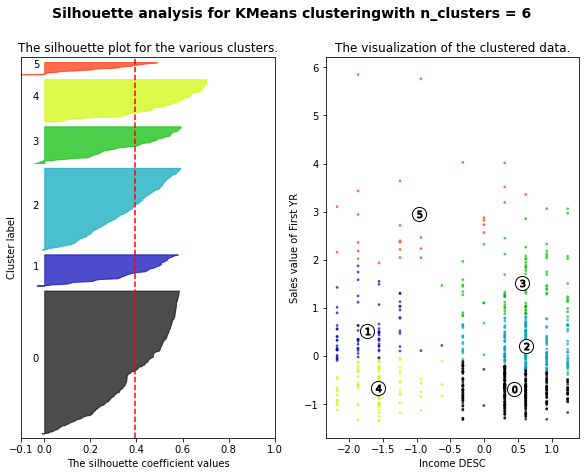

In [153]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_yr1) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_yr1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_yr1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_yr1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_yr1[:, 0], features_yr1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Income DESC")
    ax2.set_ylabel("Sales value of First YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [154]:
# Considering n_clusters=4 

In [155]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=4)
model1.fit(features_yr1)
group1 = model1.predict(features_yr1)
Observation1 = mergedata_le_scaled2.iloc[:,[2,7]]
Observation1['group']=group1

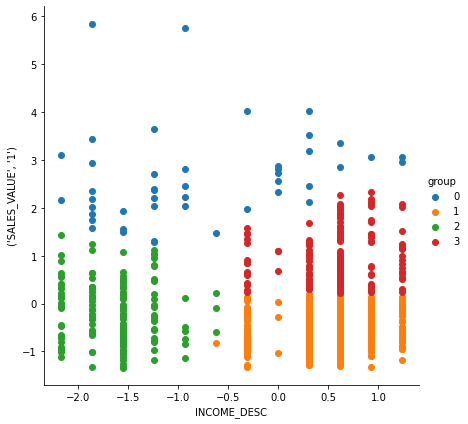

In [156]:
sns.FacetGrid(Observation1, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[2],mergedata_le_scaled2.columns[7])\
.add_legend()

In [157]:
# Considering n_clusters=5

In [158]:
from sklearn.cluster import KMeans
model11 = KMeans(n_clusters=5)
model11.fit(features_yr1)
group11 = model11.predict(features_yr1)
Observation11 = mergedata_le_scaled2.iloc[:,[2,7]]
Observation11['group']=group11

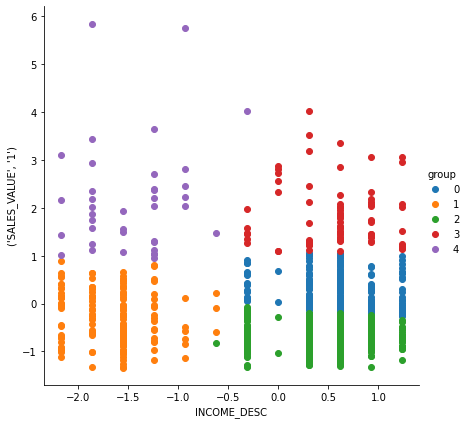

In [159]:
sns.FacetGrid(Observation11, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[2],mergedata_le_scaled2.columns[7])\
.add_legend()

In [160]:
# To verify the number of clusters using Elbow method using Kmeans++
# WCSS(Within Cluster Sum of Squares)


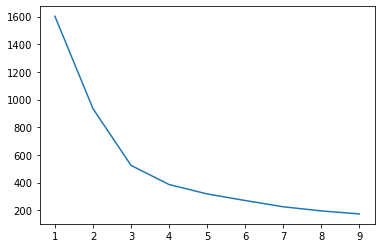

In [161]:
wcss=[]
for i in range(1,10):
    model_wcss1 = KMeans(n_clusters=i)
    model_wcss1.fit(features_yr1)
    wcss.append(model_wcss1.inertia_)

plt.plot(range(1,10),wcss)

In [162]:
# Proceeding analysis with Second Year( Trying K means clustering algorithm )

In [163]:
features_yr2 = mergedata_le_scaled2.iloc[:,[2,8]].values


In [164]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.527667739183568


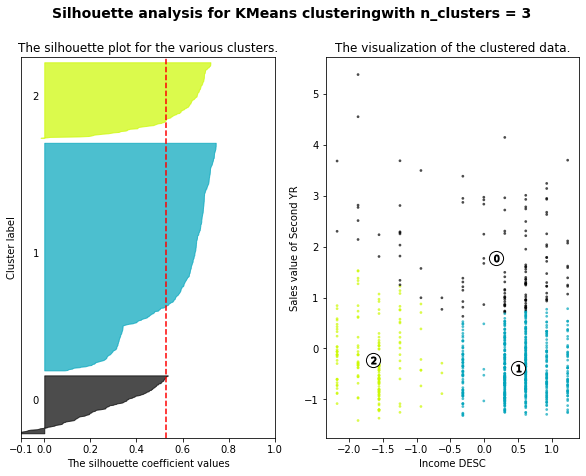

For n_clusters = 4 The average silhouette_score is : 0.4696869952677744


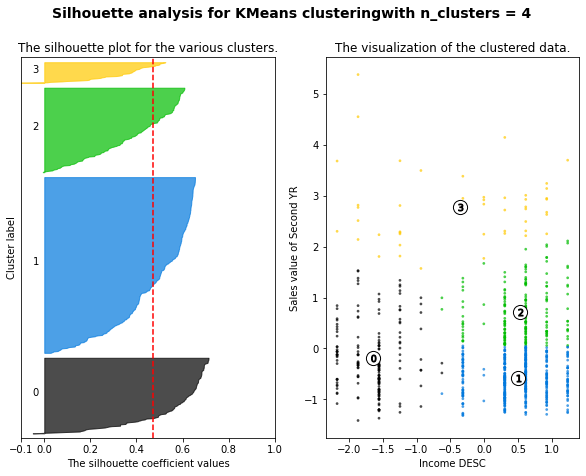

For n_clusters = 5 The average silhouette_score is : 0.45751139447685324


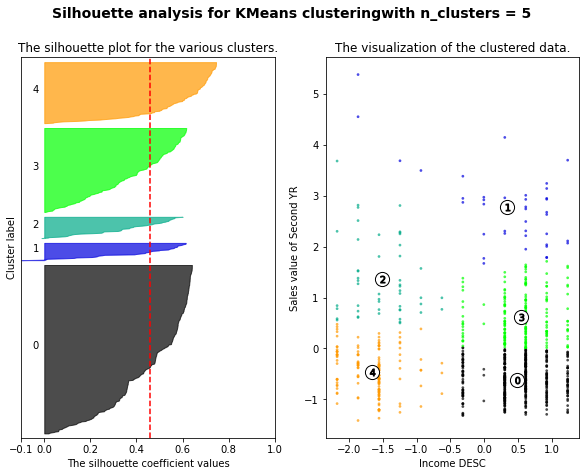

For n_clusters = 6 The average silhouette_score is : 0.3948545994290198


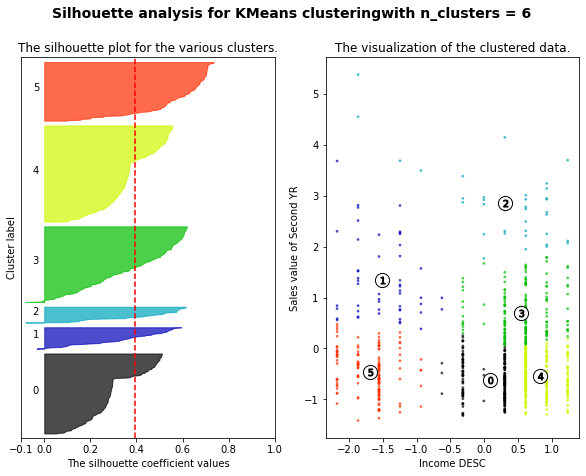

In [165]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_yr2) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_yr2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_yr2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_yr2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_yr2[:, 0], features_yr2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Income DESC")
    ax2.set_ylabel("Sales value of Second YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [166]:
# Considering n_clusters=4 

In [167]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=4)
model2.fit(features_yr2)
group2 = model2.predict(features_yr2)
Observation2 = mergedata_le_scaled2.iloc[:,[2,8]]
Observation2['group']=group2

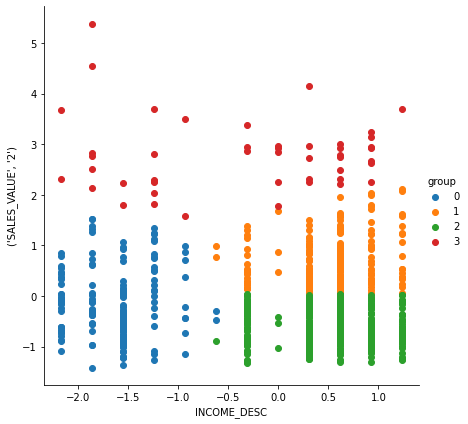

In [168]:
sns.FacetGrid(Observation2, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[2],mergedata_le_scaled2.columns[8])\
.add_legend()

In [169]:
# Considering n_clusters= 5

In [170]:
from sklearn.cluster import KMeans
model21 = KMeans(n_clusters=5)
model21.fit(features_yr2)
group21 = model21.predict(features_yr2)
Observation21 = mergedata_le_scaled2.iloc[:,[2,8]]
Observation21['group']=group21

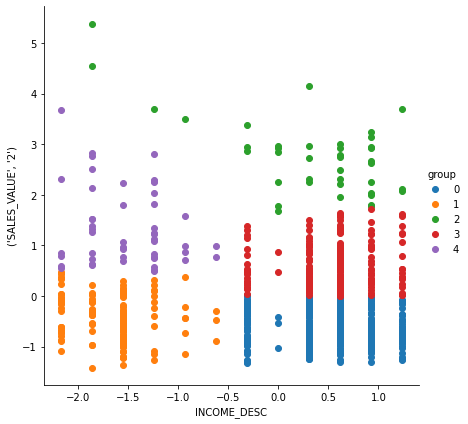

In [171]:
sns.FacetGrid(Observation21, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[2],mergedata_le_scaled2.columns[8])\
.add_legend()

In [172]:
# To verify the number of clusters using Elbow method using Kmeans++
# WCSS(Within Cluster Sum of Squares)


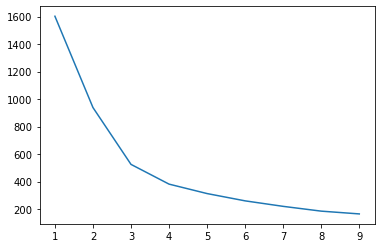

In [173]:
wcss1=[]
for i in range(1,10):
    model_wcss2 = KMeans(n_clusters=i)
    model_wcss2.fit(features_yr2)
    wcss1.append(model_wcss2.inertia_)

plt.plot(range(1,10),wcss1)

In [174]:
# Conclusion from Assumption 1 : Observing sales value and income of the customer 

#Considering n_clusters= 4

# YR 1 :
# Group 0: Customers earning less(35 - 99k) spending pattern is medium. 
# Group 1: Customers earning high(100 - 250k) spending pattern is less to medium. 
# Group 2: Customers earning less(35 - 99k) & Customers earning high(100 - 250k) spending pattern is high. 
# Group 3: Customers earning(35 - 99k) less spending pattern is less to medium.

# YR 2 :
# Group 0: Customers earning less(35 - 99k) & Customers earning high(100 - 250k)spending pattern is high. 
# Group 1: Customers earning less(35 - 99k) spending pattern is less to medium.
# Group 2: Customers earning high(100 - 250k) spending pattern is less to medium. 
# Group 3: Customers earning(35 - 99k) less spending pattern is less to medium.

# Similar spending pattern has been observed for both the years.

#*********************************************************************************************************

#Considering n_clusters= 5

# YR 1 : 
# Group 0: Customers earning(35 - 99k) less spending pattern is medium.
# Group 1: Customers earning high(100 - 250k) spending pattern is less to medium. 
# Group 2: Customers earning less(35 - 99k) & Customers earning high(100 - 250k) spending pattern is high.  
# Group 3: Customers earning less(35 - 99k) spending pattern is low. 
# Group 4: Customers earning less(35 - 99k) spending pattern is medium. 

# YR 2 : 
# Group 0: Customers earning high(100 - 250k) spending pattern is low.
# Group 1: Customers earning less(35 - 99k) spending pattern is medium. 
# Group 2: Customers earning less(35 - 99k) spending pattern is high. 
# Group 3: Customers earning high(100 - 250k) spending pattern medium to high.
# Group 4: Customers earning less(35 - 99k) spending pattern is less.

# Similar spending pattern has been observed for both the years.

In [175]:
# Assumption : 2 
# Proceeding analysis with Second Assumption ( Trying K means clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) &
# age of the customers(n_groups: 5 )

In [176]:
# Proceeding analysis with First Year( Trying K means clustering algorithm )

In [177]:
features_age_yr1 = mergedata_le_scaled2.iloc[:,[0,7]].values

In [178]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.4358305885378025


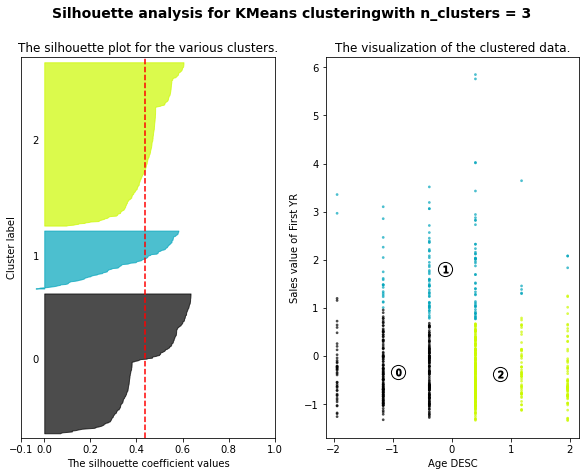

For n_clusters = 4 The average silhouette_score is : 0.4286830479352984


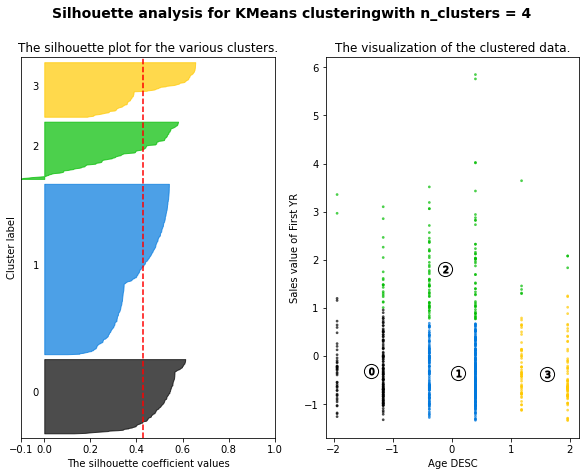

For n_clusters = 5 The average silhouette_score is : 0.4218239881004988


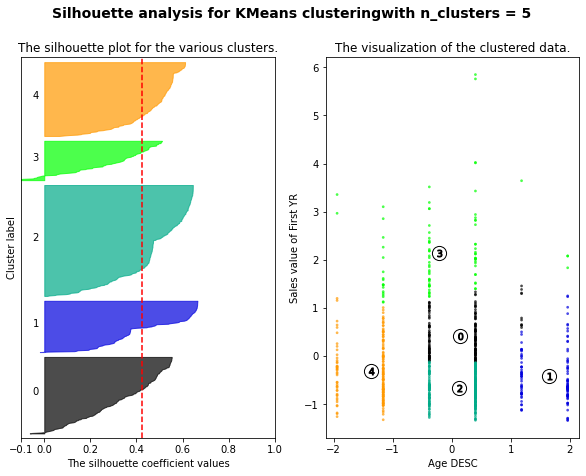

For n_clusters = 6 The average silhouette_score is : 0.4311876681029357


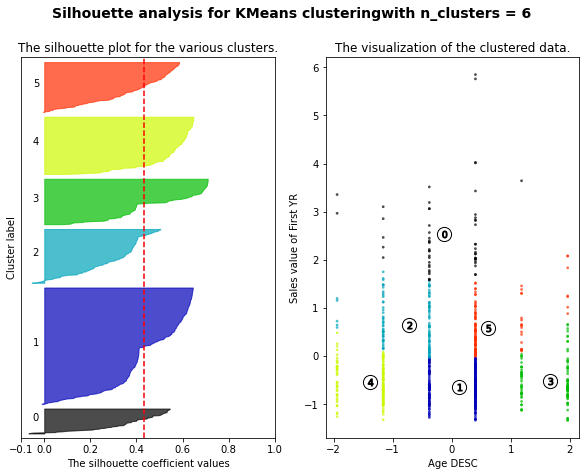

In [179]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_age_yr1) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_age_yr1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_age_yr1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_age_yr1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_age_yr1[:, 0], features_age_yr1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Age DESC")
    ax2.set_ylabel("Sales value of First YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [180]:
#Considering n_clusters= 3

In [181]:
model3_1 = KMeans(n_clusters=3)
model3_1.fit(features_age_yr1)
group3_1 = model3_1.predict(features_age_yr1)
Observation3_1 = mergedata_le_scaled2.iloc[:,[0,7]]
Observation3_1['group']=group3_1

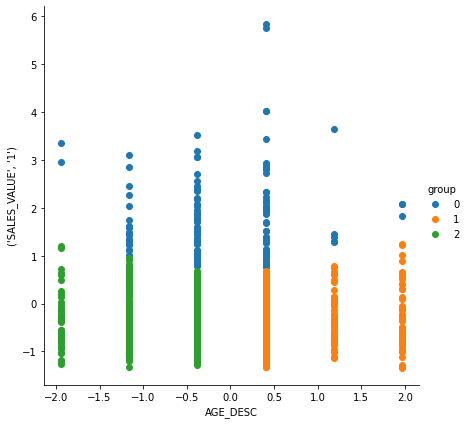

In [182]:
sns.FacetGrid(Observation3_1, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[0],mergedata_le_scaled2.columns[7])\
.add_legend()

In [183]:
#Considering n_clusters= 4

In [184]:
from sklearn.cluster import KMeans
model3 = KMeans(n_clusters=4)
model3.fit(features_age_yr1)
group3 = model3.predict(features_age_yr1)
Observation3 = mergedata_le_scaled2.iloc[:,[0,7]]
Observation3['group']=group3

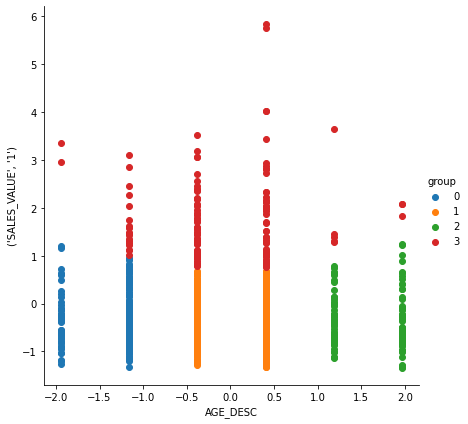

In [185]:
sns.FacetGrid(Observation3, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[0],mergedata_le_scaled2.columns[7])\
.add_legend()

In [186]:
#Considering n_clusters= 5

In [187]:
from sklearn.cluster import KMeans
model31 = KMeans(n_clusters=5)
model31.fit(features_age_yr1)
group31 = model31.predict(features_age_yr1)
Observation31 = mergedata_le_scaled2.iloc[:,[0,7]]
Observation31['group']=group31

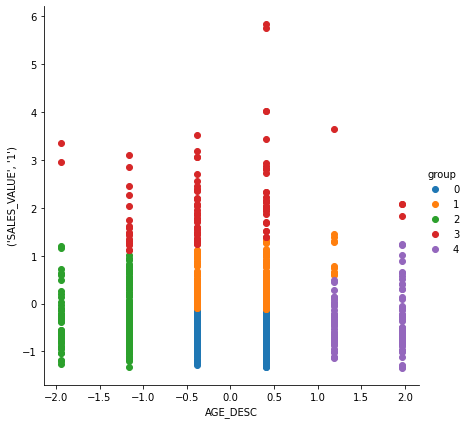

In [188]:
sns.FacetGrid(Observation31, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[0],mergedata_le_scaled2.columns[7])\
.add_legend()

In [189]:
# To verify the number of clusters using Elbow method using Kmeans++
# WCSS(Within Cluster Sum of Squares)

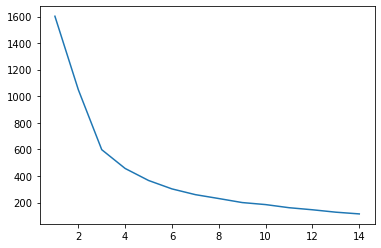

In [190]:
wcss2=[]
for i in range(1,15):
    model_wcss3 = KMeans(n_clusters=i)
    model_wcss3.fit(features_age_yr1)
    wcss2.append(model_wcss3.inertia_)

plt.plot(range(1,15),wcss2)

In [191]:
# Proceeding analysis with Second Year( Trying K means clustering algorithm )

In [192]:
features_age_yr2 = mergedata_le_scaled2.iloc[:,[0,8]].values

In [193]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.43263937272930536


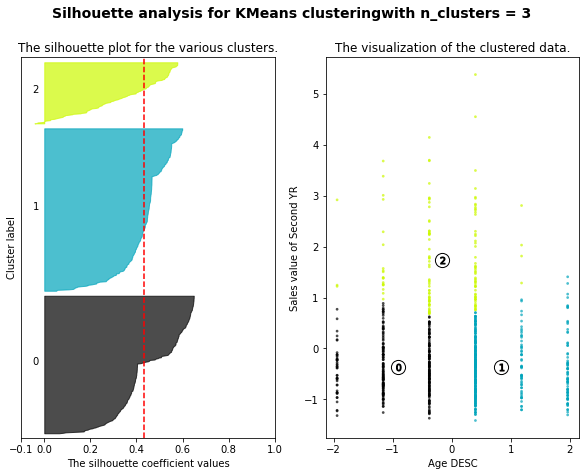

For n_clusters = 4 The average silhouette_score is : 0.42757041010972135


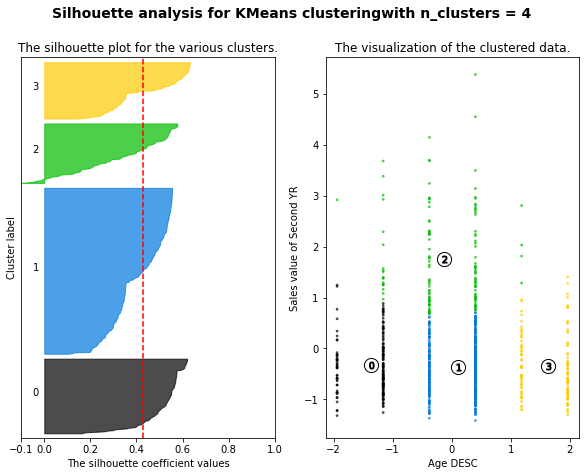

For n_clusters = 5 The average silhouette_score is : 0.43485297860827415


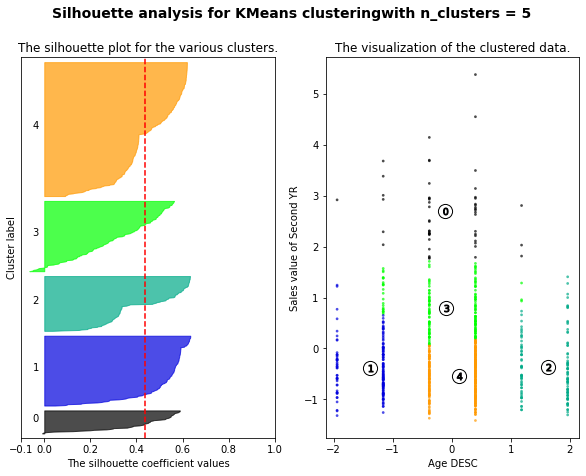

For n_clusters = 6 The average silhouette_score is : 0.43725914915663966


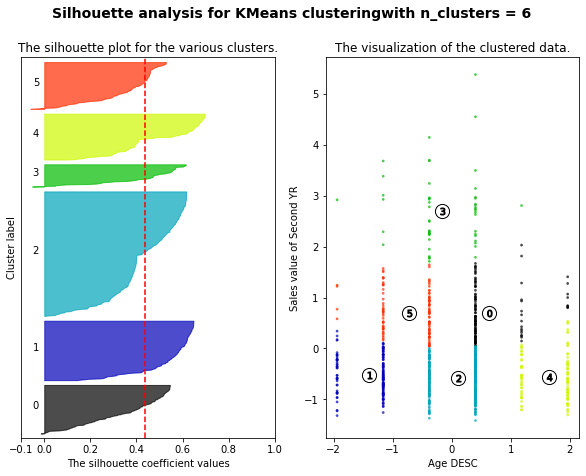

In [194]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_age_yr2) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_age_yr2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_age_yr2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_age_yr2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_age_yr2[:, 0], features_age_yr2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Age DESC")
    ax2.set_ylabel("Sales value of Second YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [195]:
#Considering n_clusters= 3

In [196]:
model4_2 = KMeans(n_clusters = 3)
model4_2.fit(features_age_yr2)
group4_2 = model4_2.predict(features_age_yr2)
Observation4_2 = mergedata_le_scaled2.iloc[:,[0,8]]
Observation4_2['group']=group4_2

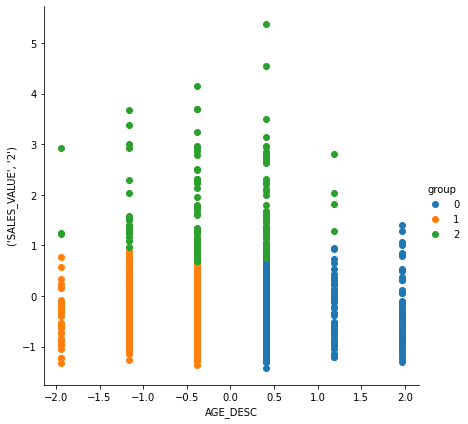

In [197]:
sns.FacetGrid(Observation4_2, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[0],mergedata_le_scaled2.columns[8])\
.add_legend()

In [198]:
#Considering n_clusters= 4

In [199]:
model4 = KMeans(n_clusters=4)
model4.fit(features_age_yr2)
group4 = model4.predict(features_age_yr2)
Observation4 = mergedata_le_scaled2.iloc[:,[0,8]]
Observation4['group']=group4

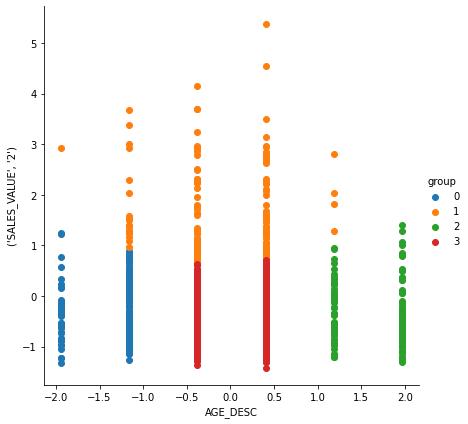

In [200]:
sns.FacetGrid(Observation4, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[0],mergedata_le_scaled2.columns[8])\
.add_legend()

In [201]:
#Considering n_clusters= 5

In [202]:
model4_1 = KMeans(n_clusters=5)
model4_1.fit(features_age_yr2)
group4_1 = model4_1.predict(features_age_yr2)
Observation4_1 = mergedata_le_scaled2.iloc[:,[0,8]]
Observation4_1['group']=group4_1

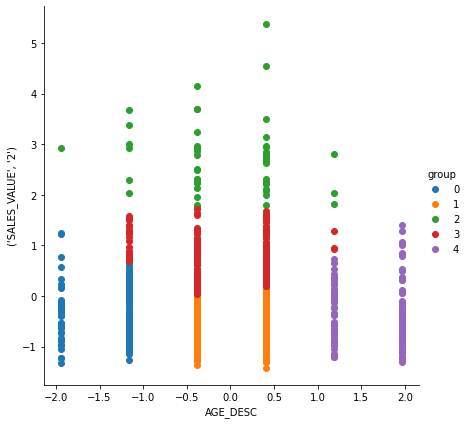

In [203]:
sns.FacetGrid(Observation4_1, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[0],mergedata_le_scaled2.columns[8])\
.add_legend()

In [204]:
# To verify the number of clusters using Elbow method using Kmeans++
# WCSS(Within Cluster Sum of Squares)

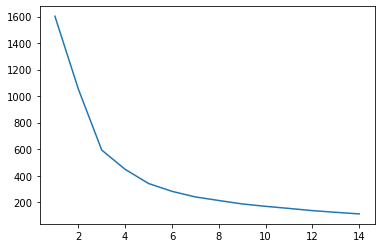

In [205]:
wcss3=[]
for i in range(1,15):
    model_wcss4 = KMeans(n_clusters=i)
    model_wcss4.fit(features_age_yr2)
    wcss3.append(model_wcss4.inertia_)

plt.plot(range(1,15),wcss3)

In [206]:
# Conclusion from Assumption 2 : Observing sales value and age of the customers

#Considering n_clusters= 3

# YR 1 :
# Group 0: Customers within 35-54 age range are most shoppers of the retailer mostly they have contributed 
#          towards retailer sales, among these age group some of the customers spending pattern was at higher end.
# Group 1: Customers within 55-65 age group's spending pattern on medium & lower range. 
# Group 2: Customers within 19-34 age group's spending pattern on medium & lower range. 

# YR 2 : Similar spending pattern has been observed for second year also.

#*********************************************************************************************************

#Considering n_clusters= 4

# YR 1 :
# Group 0: Customers within 35-54 age group's spending pattern is high.
# Group 1: Customers within 55-65 age group's spending pattern on medium & lower range. 
# Group 2: Customers within 35-54 age group's spending pattern is low to medium.
# Group 3: Customers within 19-34 age group's spending pattern on medium & lower range. 

# YR 2 : Similar spending pattern has been observed for second year also.

#*********************************************************************************************************

#Considering n_clusters= 5

# YR 1 :
# Group 0: Customers within 19-34 age group's spending pattern on medium & lower range. 
# Group 1: Some of the customers within 35-54 age group's spending pattern is high.
# Group 2: Customers within 55-65 age group's spending pattern on medium & lower range. 
# Group 3: Customers within 19-34 age group's spending pattern on medium & lower range. 
# Group 4: Some of the customers within 35-54 age group's spending pattern is low.

# YR 2 : Similar spending pattern has been observed for second year also.

In [207]:

# Assumption : 3 
# Proceeding analysis with Third Assumption ( Trying K means clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) &
# HOMEOWNER_DESC of the customers(n_groups: ? ) 

In [208]:
# Proceeding analysis with First Year( Trying K means clustering algorithm )

In [209]:
features_owner_yr1 = mergedata_le_scaled2.iloc[:,[3,7]].values

In [210]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.6446342083477793


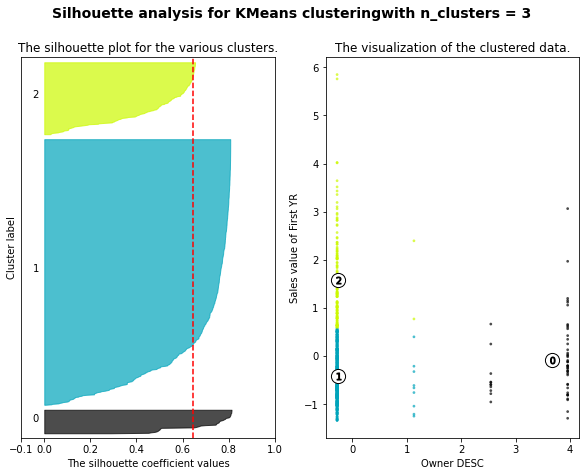

For n_clusters = 4 The average silhouette_score is : 0.5812299674647405


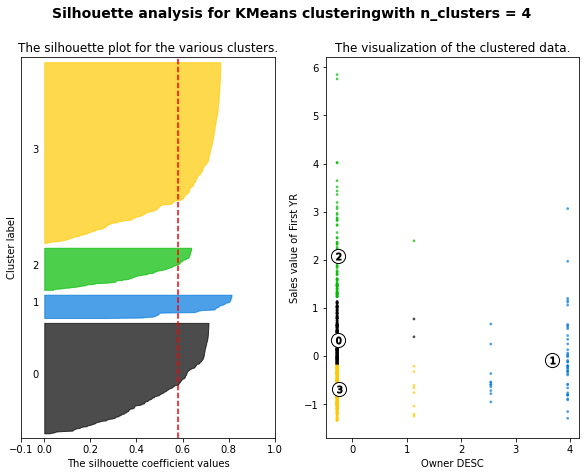

For n_clusters = 5 The average silhouette_score is : 0.5730396076353246


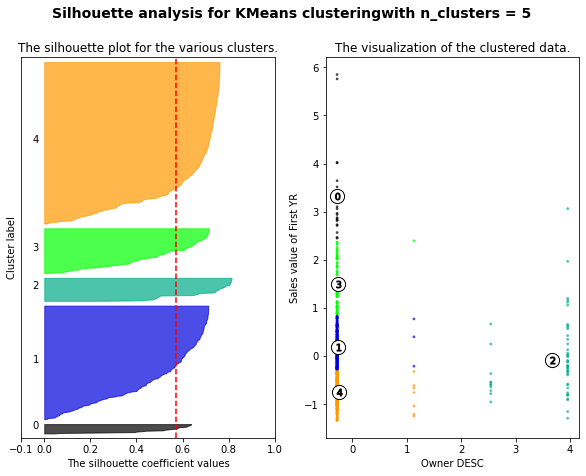

For n_clusters = 6 The average silhouette_score is : 0.5530614128210112


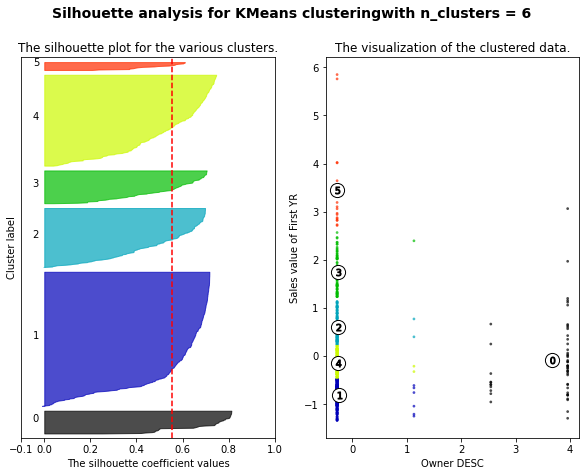

In [211]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_owner_yr1) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_owner_yr1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_owner_yr1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_owner_yr1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_owner_yr1[:, 0], features_owner_yr1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Owner DESC")
    ax2.set_ylabel("Sales value of First YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [212]:
#Considering n_clusters= 3

In [213]:
model5 = KMeans(n_clusters=3)
model5.fit(features_owner_yr1)
group5 = model5.predict(features_owner_yr1)
Observation5 = mergedata_le_scaled2.iloc[:,[3,7]]
Observation5['group']=group5

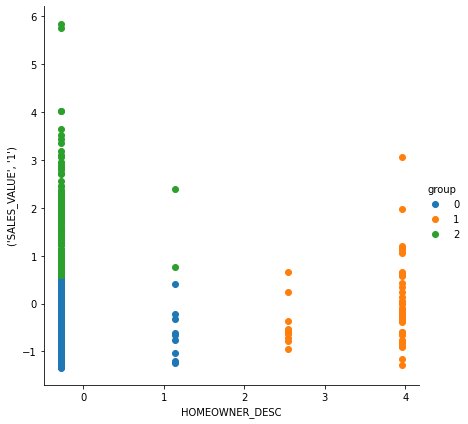

In [214]:
sns.FacetGrid(Observation5, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[3],mergedata_le_scaled2.columns[7])\
.add_legend()

In [215]:
# To verify the number of clusters using Elbow method using Kmeans++
# WCSS(Within Cluster Sum of Squares)

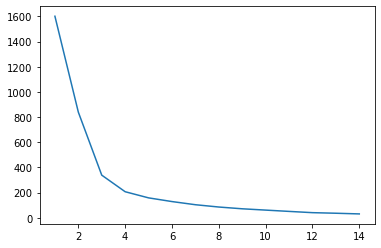

In [216]:
wcss4=[]

for i in range(1,15):
    model_wcss5 = KMeans(n_clusters=i)
    model_wcss5.fit(features_owner_yr1)
    wcss4.append(model_wcss5.inertia_)

plt.plot(range(1,15),wcss4)

In [217]:
# Proceeding analysis with second Year( Trying K means clustering algorithm )

In [218]:
features_owner_yr2 = mergedata_le_scaled2.iloc[:,[3,8]].values

In [219]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.6413891279158453


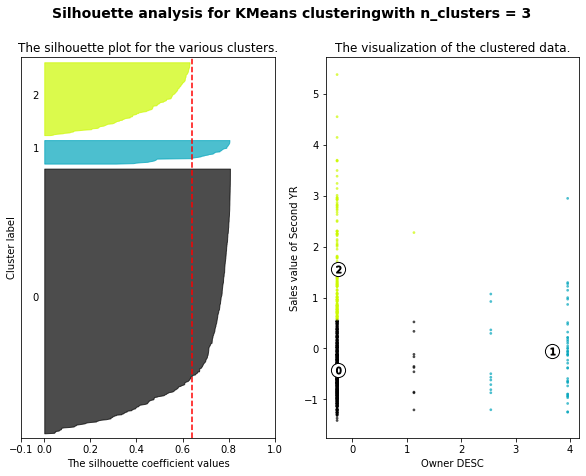

For n_clusters = 4 The average silhouette_score is : 0.5887230329552126


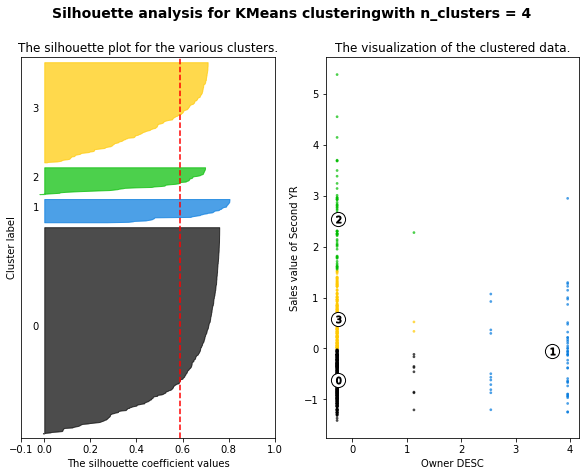

For n_clusters = 5 The average silhouette_score is : 0.5481394844011657


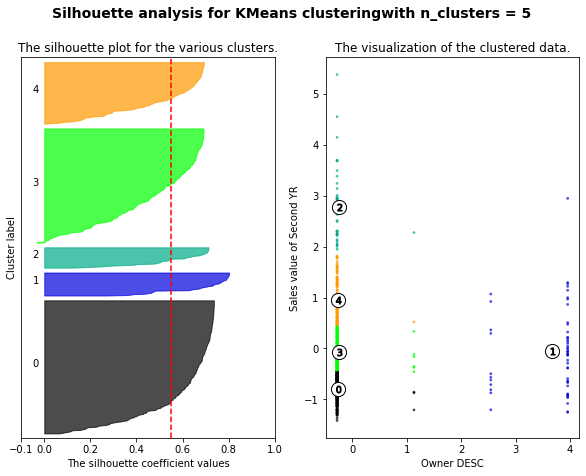

For n_clusters = 6 The average silhouette_score is : 0.5535535768854408


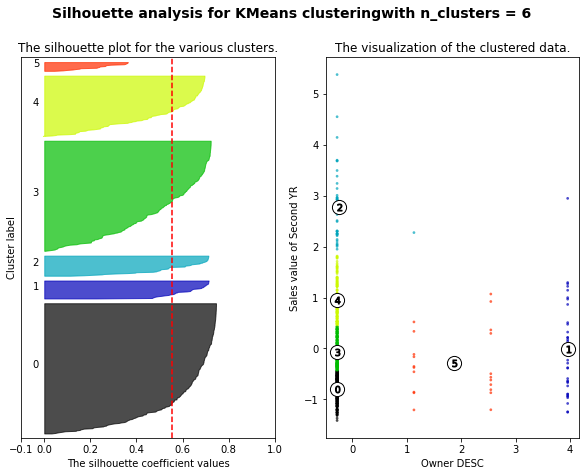

In [220]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_owner_yr2) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_owner_yr2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_owner_yr2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_owner_yr2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_owner_yr2[:, 0], features_owner_yr2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Owner DESC")
    ax2.set_ylabel("Sales value of Second YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [221]:
#Considering n_clusters= 3

In [222]:
model6 = KMeans(n_clusters=3)
model6.fit(features_owner_yr2)
group6 = model6.predict(features_owner_yr2)
Observation6 = mergedata_le_scaled2.iloc[:,[3,8]]
Observation6['group']=group6

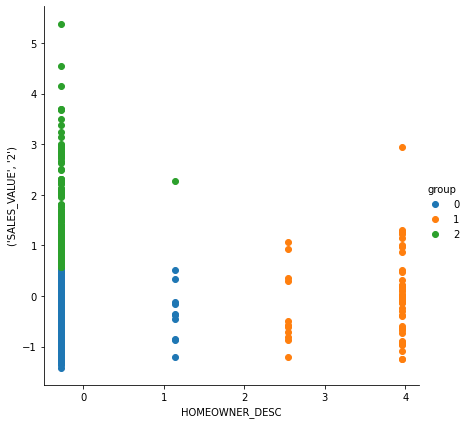

In [223]:
sns.FacetGrid(Observation6, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[3],mergedata_le_scaled2.columns[8])\
.add_legend()

In [224]:
# To verify the number of clusters using Elbow method using Kmeans++
# WCSS(Within Cluster Sum of Squares)

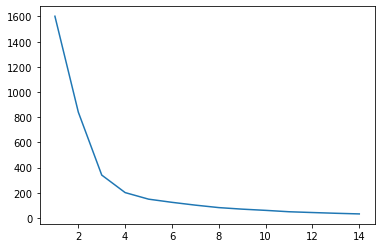

In [225]:
wcss5=[]

for i in range(1,15):
    model_wcss6 = KMeans(n_clusters=i)
    model_wcss6.fit(features_owner_yr2)
    wcss5.append(model_wcss6.inertia_)

plt.plot(range(1,15),wcss5)

In [226]:
# Conclusion from Assumption 3 : Observing sales value and homeowner_desc of the customers

# YR 1 : 

#Observation 1: 
#Most of the customers of the retailers are Homeowner & their spending pattern lies low, medium & high. 

#Observation 2: 
#Also few customers of the retailers are Renter & their spending pattern is medium. 

# YR 2 : 

# Similar spending pattern has been observed for sencond year also. 

In [227]:
# Assumption : 4 
# Proceeding analysis with Fourth Assumption ( Trying K means clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) &
# MARITAL_STATUS of the customers(n_groups: 5 )

In [228]:
# Proceeding analysis with First Year( Trying K means clustering algorithm )

In [229]:
features_marital_yr1 = mergedata_le_scaled2.iloc[:,[1,7]].values

In [230]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.5338834820986305


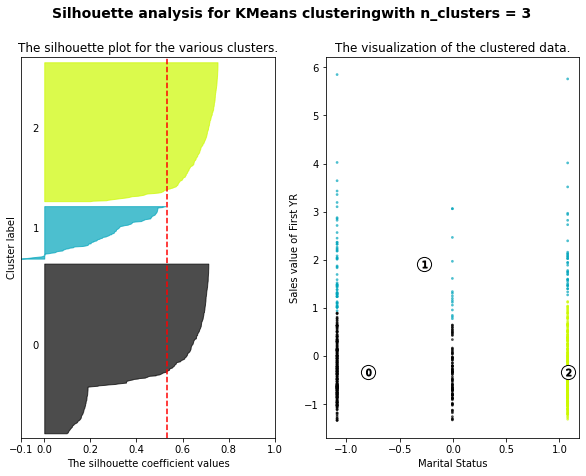

For n_clusters = 4 The average silhouette_score is : 0.5233984870873144


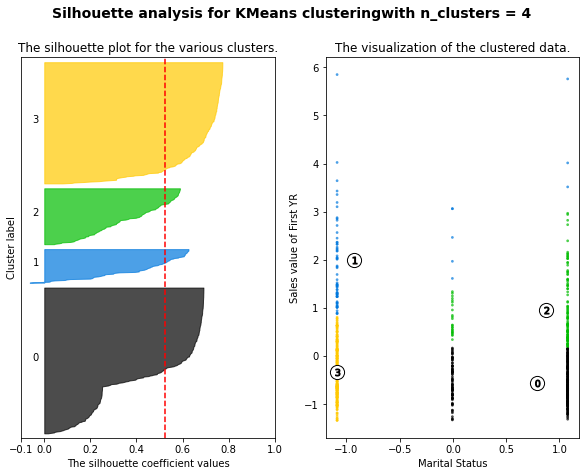

For n_clusters = 5 The average silhouette_score is : 0.4862628380811982


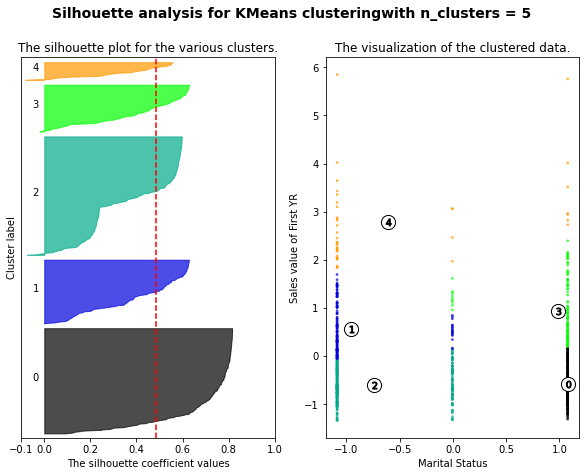

For n_clusters = 6 The average silhouette_score is : 0.5494072794049099


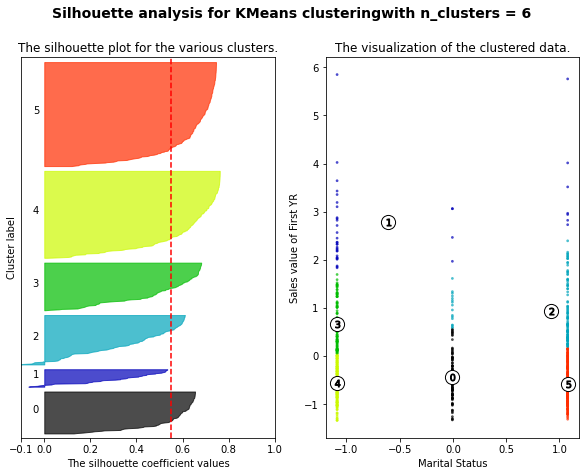

In [231]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_marital_yr1) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_marital_yr1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_marital_yr1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_marital_yr1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_marital_yr1[:, 0], features_marital_yr1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Marital Status")
    ax2.set_ylabel("Sales value of First YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [232]:
#Considering n_clusters= 4

In [233]:
model7 = KMeans(n_clusters=4)
model7.fit(features_marital_yr1)

group7 = model7.predict(features_marital_yr1)
Observation7 = mergedata_le_scaled2.iloc[:,[1,7]]
Observation7['group']=group7

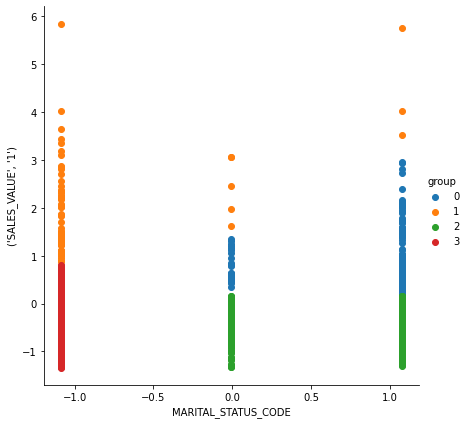

In [234]:
sns.FacetGrid(Observation7, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[1],mergedata_le_scaled2.columns[7])\
.add_legend()

In [235]:
# Proceeding analysis with second Year( Trying K means clustering algorithm )

In [236]:
features_marital_yr2 = mergedata_le_scaled2.iloc[:,[1,8]].values

In [237]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.530295513516801


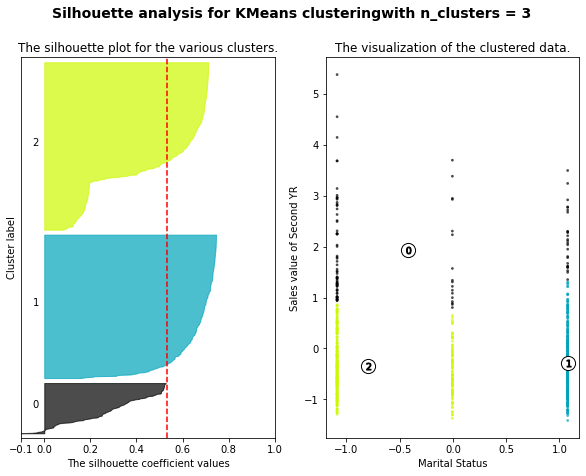

For n_clusters = 4 The average silhouette_score is : 0.5176138758576869


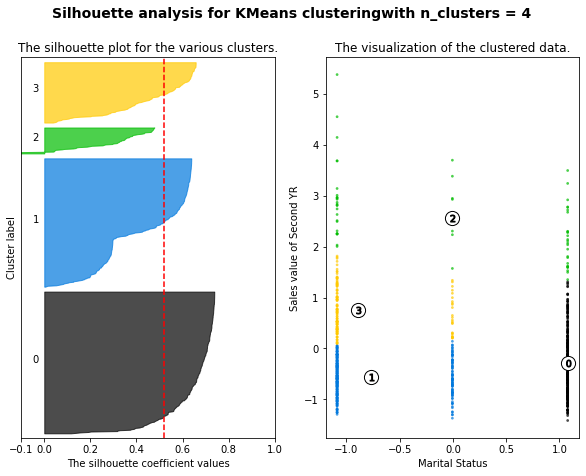

For n_clusters = 5 The average silhouette_score is : 0.5114775622381929


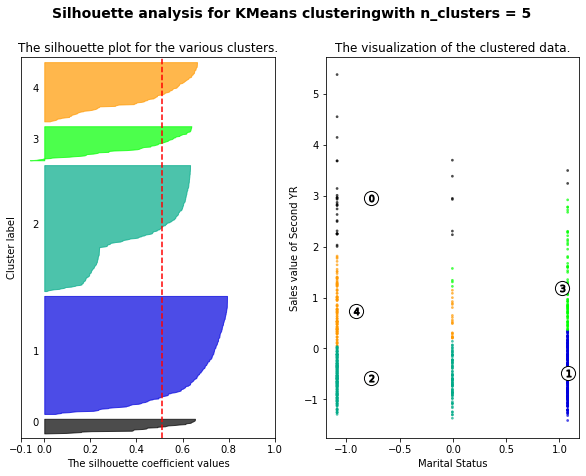

For n_clusters = 6 The average silhouette_score is : 0.5597111862184608


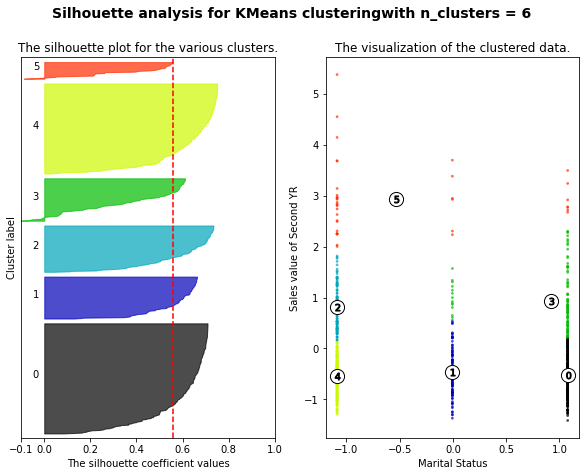

In [238]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_marital_yr2) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_marital_yr2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_marital_yr2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_marital_yr2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_marital_yr2[:, 0], features_marital_yr2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Marital Status")
    ax2.set_ylabel("Sales value of Second YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [239]:
#Considering n_clusters= 5

In [240]:
model8 = KMeans(n_clusters=5)
model8.fit(features_marital_yr2)

group8 = model8.predict(features_marital_yr2)

Observation8 = mergedata_le_scaled2.iloc[:,[1,8]]
Observation8['group']=group8

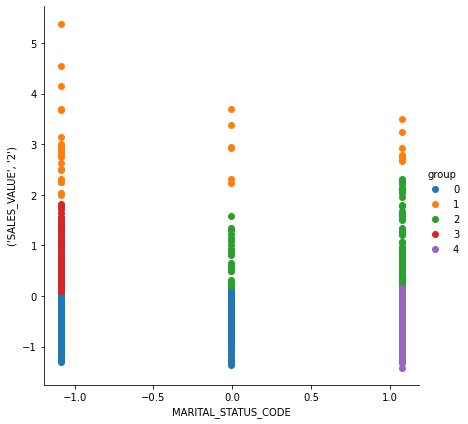

In [241]:
sns.FacetGrid(Observation8, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[1],mergedata_le_scaled2.columns[8])\
.add_legend()

In [242]:
# Conclusion from Assumption 4 : Observing sales value and MARITAL_STATUS of the customers 

# YR 1 : 

#Observation 1: 

# Customers with all types of marital status are shoppers of retailer & their spending pattern lies low, medium & high. 

# YR 2 : 

# Similar spending pattern has been observed for sencond year also. 

In [243]:
# Assumption : 5
# Proceeding analysis with Fifth Assumption ( Trying K means clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) &
# HH_COMP_DESC(Family Details) of the customers(n_groups: 5 )

In [244]:
# Proceeding analysis with Second Year( Trying K means clustering algorithm )

In [245]:
features_familydetails_yr2 = mergedata_le_scaled2.iloc[:,[4,8]].values

In [246]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.4596111134560227


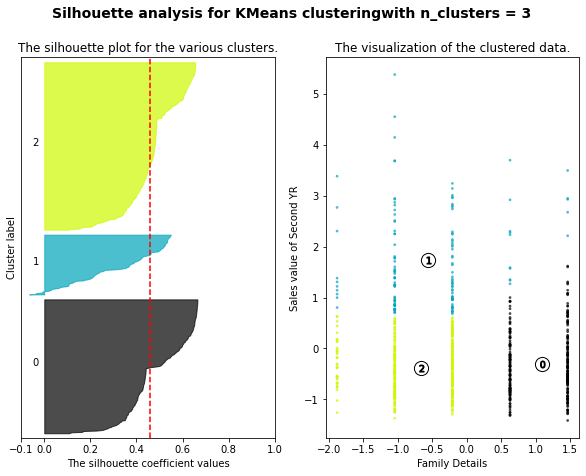

For n_clusters = 4 The average silhouette_score is : 0.4319770682435478


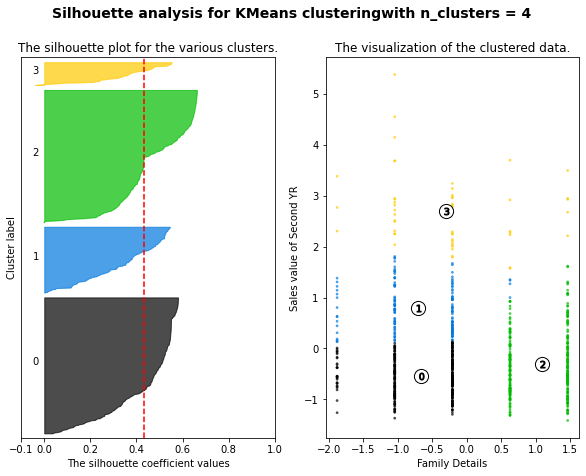

For n_clusters = 5 The average silhouette_score is : 0.4025875173553234


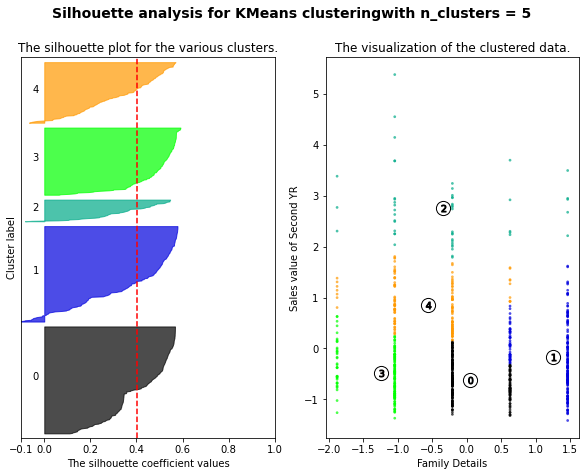

For n_clusters = 6 The average silhouette_score is : 0.4262386144576321


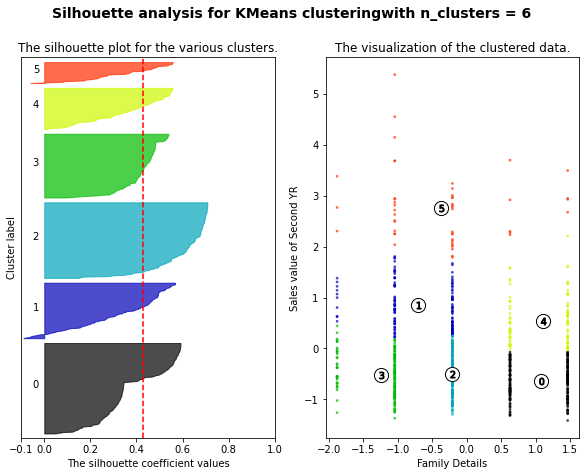

In [247]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_familydetails_yr2) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_familydetails_yr2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_familydetails_yr2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_familydetails_yr2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_familydetails_yr2[:, 0], features_familydetails_yr2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Family Details")
    ax2.set_ylabel("Sales value of Second YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [248]:
#Considering n_clusters= 3

In [249]:
model9 = KMeans(n_clusters=3)
model9.fit(features_familydetails_yr2)

group9 = model9.predict(features_familydetails_yr2)
Observation9 = mergedata_le_scaled2.iloc[:,[4,8]]
Observation9['group']=group9

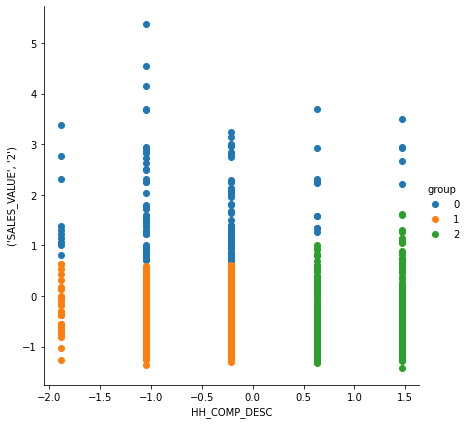

In [250]:
sns.FacetGrid(Observation9, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[4],mergedata_le_scaled2.columns[8])\
.add_legend()

In [251]:
# Proceeding analysis with First Year( Trying K means clustering algorithm )

In [252]:
features_familydetails_yr1 = mergedata_le_scaled2.iloc[:,[4,7]].values

In [253]:
# Performing silhouette Analysis : 

For n_clusters = 3 The average silhouette_score is : 0.46645946138678834


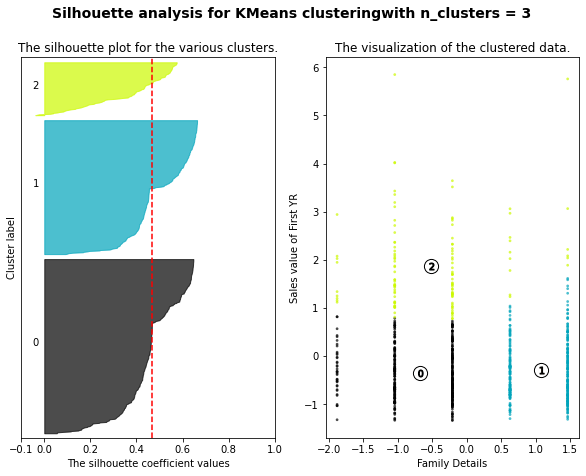

For n_clusters = 4 The average silhouette_score is : 0.4228261253569266


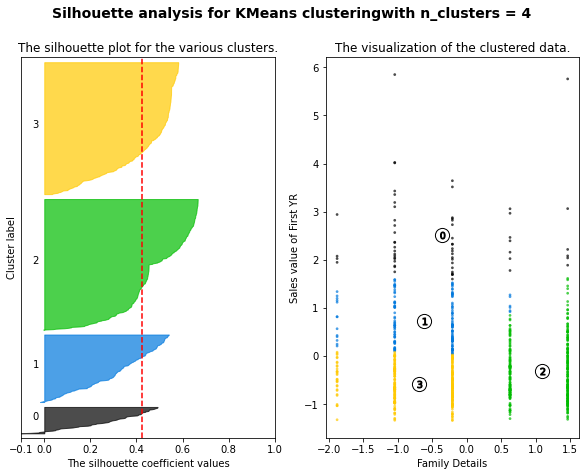

For n_clusters = 5 The average silhouette_score is : 0.3952568643694355


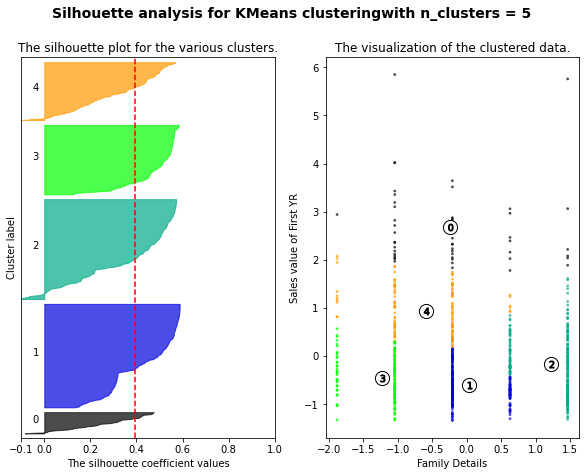

For n_clusters = 6 The average silhouette_score is : 0.4237145709422752


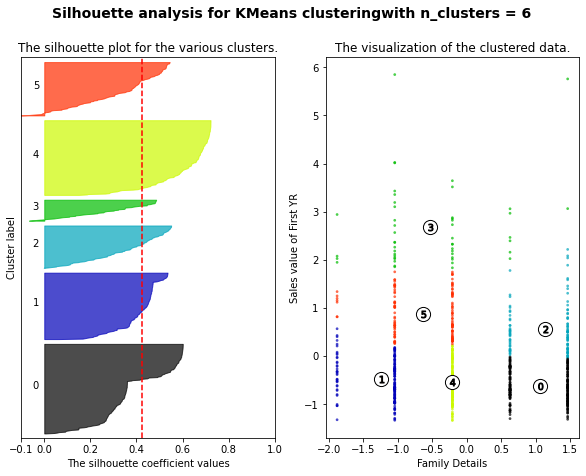

In [254]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them  clearly.
    ax1.set_ylim([0, len(features_familydetails_yr1) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_familydetails_yr1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_familydetails_yr1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_familydetails_yr1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_familydetails_yr1[:, 0], features_familydetails_yr1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Family Details")
    ax2.set_ylabel("Sales value of First YR")

    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [255]:
#Considering n_clusters= 3

In [256]:
model10 = KMeans(n_clusters=3)
model10.fit(features_familydetails_yr1)

group10 = model10.predict(features_familydetails_yr1)
Observation10 = mergedata_le_scaled2.iloc[:,[4,7]]
Observation10['group']= group10

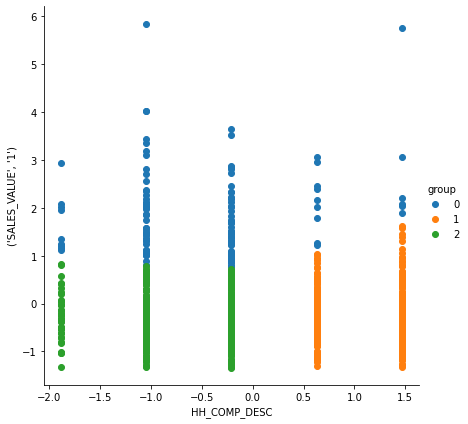

In [257]:
sns.FacetGrid(Observation10, hue='group', size=6) \
.map(plt.scatter,mergedata_le_scaled2.columns[4],mergedata_le_scaled2.columns[7])\
.add_legend()

In [258]:
# Conclusion from Assumption 5 : Observing sales value and HH_COMP_DESC(Family Details) of the customers 

# YR 1 : 

#Observation 1: 
#Most of the customers purchased product from retailer are 2 Adults No Kids & 2 Adults Kids.

# YR 2 : 

# Similar spending pattern has been observed for sencond year also but second year 2 adults kids, Single Female &
# single male purchased more from the retailer compare to first year. 


In [259]:
# *****************************  Consolidated analysis using Kmeans  ********************************************

# Conclusion from Assumption 1 : Observing sales value and income of the customer 

#Considering n_clusters= 4

# YR 1 :
# Group 0: Customers earning less(35 - 99k) spending pattern is medium. 
# Group 1: Customers earning high(100 - 250k) spending pattern is less to medium. 
# Group 2: Customers earning less(35 - 99k) & Customers earning high(100 - 250k) spending pattern is high. 
# Group 3: Customers earning(35 - 99k) less spending pattern is less to medium.

# YR 2 :
# Group 0: Customers earning less(35 - 99k) & Customers earning high(100 - 250k)spending pattern is high. 
# Group 1: Customers earning less(35 - 99k) spending pattern is less to medium.
# Group 2: Customers earning high(100 - 250k) spending pattern is less to medium. 
# Group 3: Customers earning(35 - 99k) less spending pattern is less to medium.

# Similar spending pattern has been observed for both the years.

#*********************************************************************************************************

#Considering n_clusters= 5

# YR 1 : 
# Group 0: Customers earning(35 - 99k) less spending pattern is medium.
# Group 1: Customers earning high(100 - 250k) spending pattern is less to medium. 
# Group 2: Customers earning less(35 - 99k) & Customers earning high(100 - 250k) spending pattern is high.  
# Group 3: Customers earning less(35 - 99k) spending pattern is low. 
# Group 4: Customers earning less(35 - 99k) spending pattern is medium. 

# YR 2 : 
# Group 0: Customers earning high(100 - 250k) spending pattern is low.
# Group 1: Customers earning less(35 - 99k) spending pattern is medium. 
# Group 2: Customers earning less(35 - 99k) spending pattern is high. 
# Group 3: Customers earning high(100 - 250k) spending pattern medium to high.
# Group 4: Customers earning less(35 - 99k) spending pattern is less.

# Similar spending pattern has been observed for both the years.

############################################################################################################
############################################################################################################

# Conclusion from Assumption 2 : Observing sales value and age of the customers

#Considering n_clusters= 3

# YR 1 :
# Group 0: Customers within 35-54 age range are most shoppers of the retailer mostly they have contributed 
#          towards retailer sales, among these age group some of the customers spending pattern was at higher end.
# Group 1: Customers within 55-65 age group's spending pattern on medium & lower range. 
# Group 2: Customers within 19-34 age group's spending pattern on medium & lower range. 

# YR 2 : Similar spending pattern has been observed for second year also.

#*********************************************************************************************************

#Considering n_clusters= 4

# YR 1 :
# Group 0: Customers within 35-54 age group's spending pattern is high.
# Group 1: Customers within 55-65 age group's spending pattern on medium & lower range. 
# Group 2: Customers within 35-54 age group's spending pattern is low to medium.
# Group 3: Customers within 19-34 age group's spending pattern on medium & lower range. 

# YR 2 : Similar spending pattern has been observed for second year also.

#*********************************************************************************************************

#Considering n_clusters= 5

# YR 1 :
# Group 0: Customers within 19-34 age group's spending pattern on medium & lower range. 
# Group 1: Some of the customers within 35-54 age group's spending pattern is high.
# Group 2: Customers within 55-65 age group's spending pattern on medium & lower range. 
# Group 3: Customers within 19-34 age group's spending pattern on medium & lower range. 
# Group 4: Some of the customers within 35-54 age group's spending pattern is low.

# YR 2 : Similar spending pattern has been observed for second year also.

############################################################################################################
############################################################################################################

# Conclusion from Assumption 3 : Observing sales value and homeowner_desc of the customers

# YR 1 : 

#Observation 1: 
#Most of the customers of the retailers are Homeowner & their spending pattern lies low, medium & high. 

#Observation 2: 
#Also few customers of the retailers are Renter & their spending pattern is medium. 

# YR 2 : 

# Similar spending pattern has been observed for sencond year also. 

############################################################################################################
############################################################################################################

# Conclusion from Assumption 4 : Observing sales value and MARITAL_STATUS of the customers 

# YR 1 : 

#Observation 1: 

# Customers with all types of marital status are shoppers of retailer & their spending pattern lies low, medium & high. 

# YR 2 : 

# Similar spending pattern has been observed for sencond year also. 

############################################################################################################
############################################################################################################

# Conclusion from Assumption 5 : Observing sales value and HH_COMP_DESC(Family Details) of the customers 

# YR 1 : 

#Observation 1: 
#Most of the customers purchased product from retailer are 2 Adults No Kids & 2 Adults Kids.

# YR 2 : 

# Similar spending pattern has been observed for sencond year also but second year 2 adults kids, Single Female &
# single male purchased more from the retailer compare to first year. 


In [260]:
#Applying other clustering methods 

In [261]:
#Applying Hierarchical Clustering on dataframe( Deography + Transactional )

In [262]:
# Assumption : 1
# Proceeding analysis with First Assumption ( Trying Hierarchical clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) and
# income description (n_groups: ? )


In [263]:
# YR : 1

In [264]:
features_yr1 = mergedata_le_scaled2.iloc[:,[2,7]]

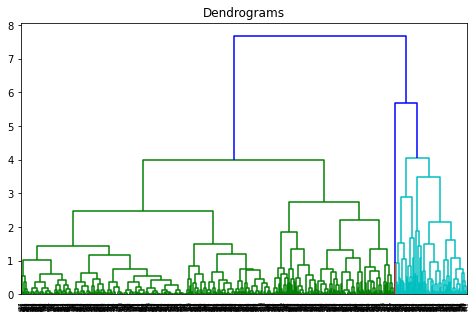

In [265]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_yr1, method='complete'))

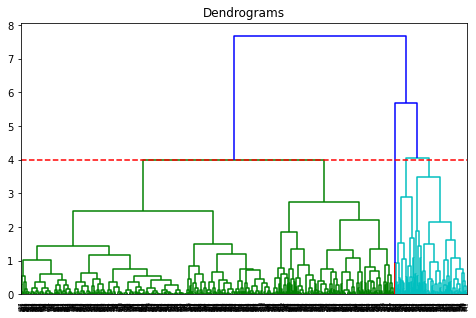

In [266]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_yr1, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

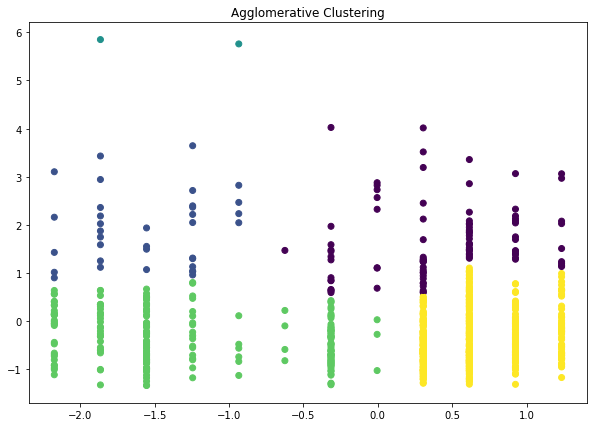

In [267]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(features_yr1)
features_yr1['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_yr1['INCOME_DESC'], features_yr1[('SALES_VALUE', '1')], c=features_yr1['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [268]:
# YR : 2 

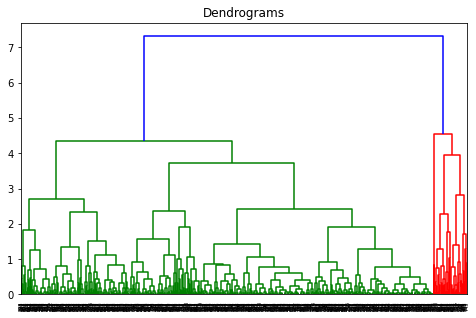

In [269]:
features_yr2 = mergedata_le_scaled2.iloc[:,[2,8]]
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_yr2, method='complete'))

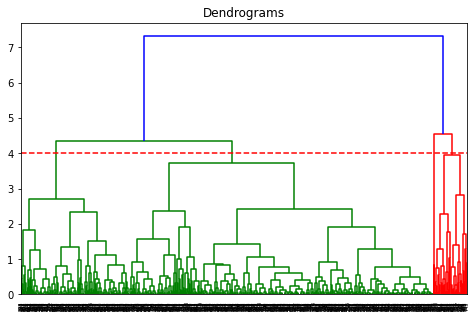

In [270]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_yr2, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

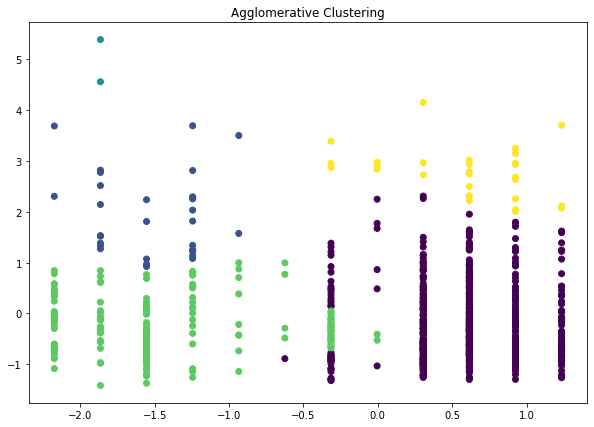

In [271]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(features_yr2)
features_yr2['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_yr2['INCOME_DESC'], features_yr2[('SALES_VALUE', '2')], c=features_yr2['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [272]:
# Assumption : 2
# Proceeding analysis with Second Assumption ( Trying Hierarchical clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) and age of the customers(n_groups: ? )


In [273]:
# YR : 1

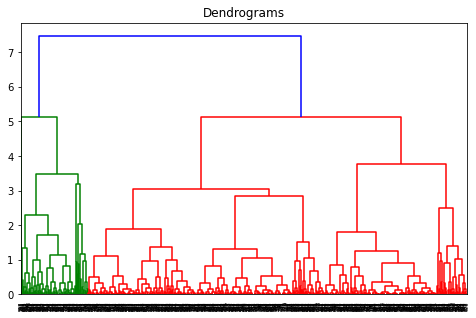

In [274]:
features_age_yr1 = mergedata_le_scaled2.iloc[:,[0,7]]

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_age_yr1, method='complete'))

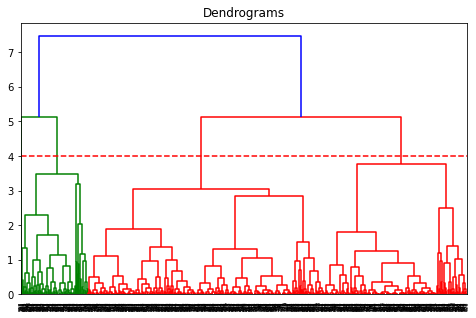

In [275]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_age_yr1, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

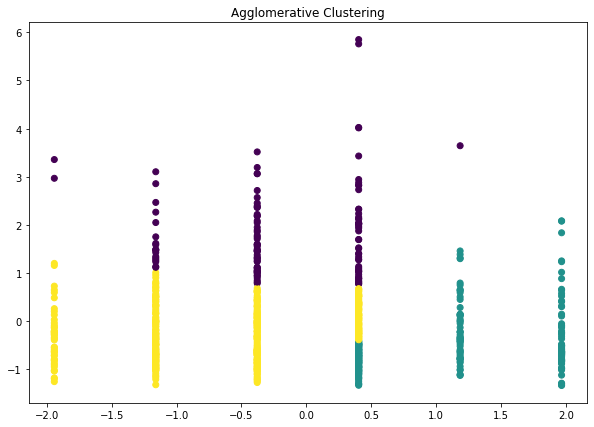

In [276]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(features_age_yr1)
features_age_yr1['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_age_yr1['AGE_DESC'], features_age_yr1[('SALES_VALUE', '1')], c=features_age_yr1['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [277]:
# YR : 2

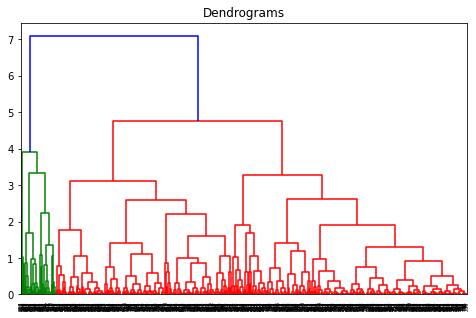

In [278]:
features_age_yr2 = mergedata_le_scaled2.iloc[:,[0,8]]

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_age_yr2, method='complete'))

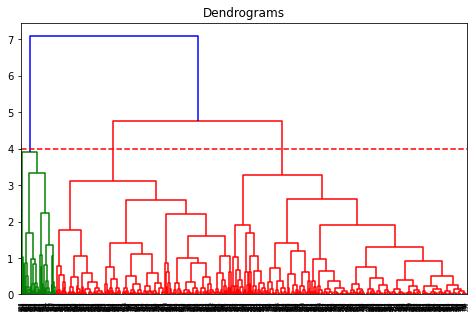

In [279]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_age_yr2, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

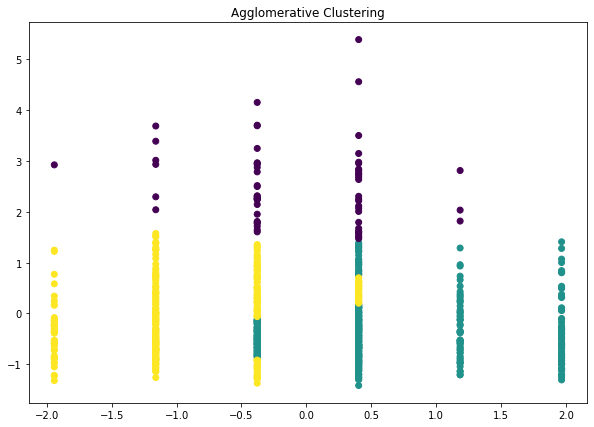

In [280]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(features_age_yr2)
features_age_yr2['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_age_yr2['AGE_DESC'], features_age_yr2[('SALES_VALUE', '2')], c=features_age_yr2['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [281]:
# Assumption : 3
# Proceeding analysis with Third Assumption ( Trying Hierarchical clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) and HOMEOWNER_DESC of the customers(n_groups: ? )

In [282]:
# YR : 1

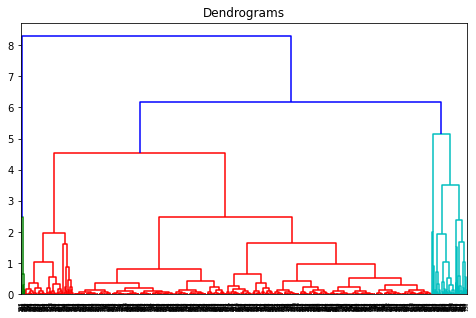

In [283]:
features_owner_yr1 = mergedata_le_scaled2.iloc[:,[3,7]]

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_owner_yr1, method='complete'))

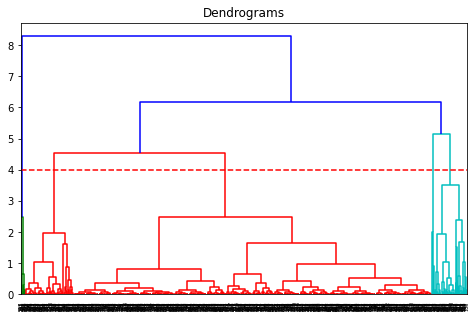

In [284]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_owner_yr1, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

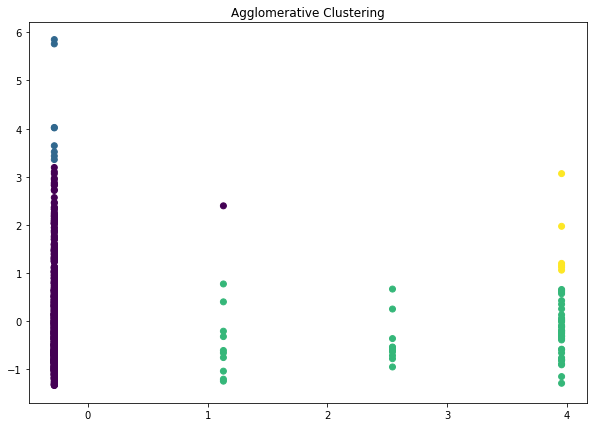

In [285]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(features_owner_yr1)
features_owner_yr1['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_owner_yr1['HOMEOWNER_DESC'], features_owner_yr1[('SALES_VALUE', '1')], c=features_owner_yr1['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [286]:
# YR : 2 

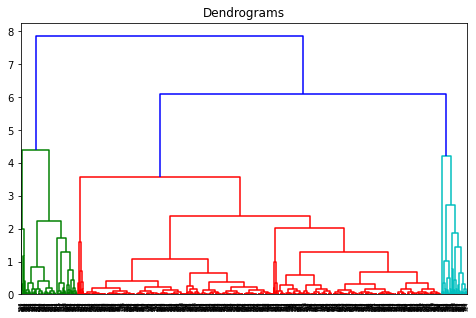

In [287]:
features_owner_yr2 = mergedata_le_scaled2.iloc[:,[3,8]]

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_owner_yr2, method='complete'))

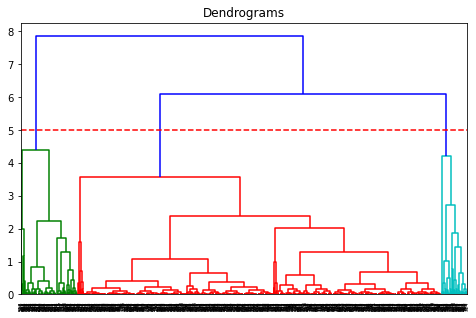

In [288]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_owner_yr2, method='complete'))
plt.axhline(y=5, color='r', linestyle='--')

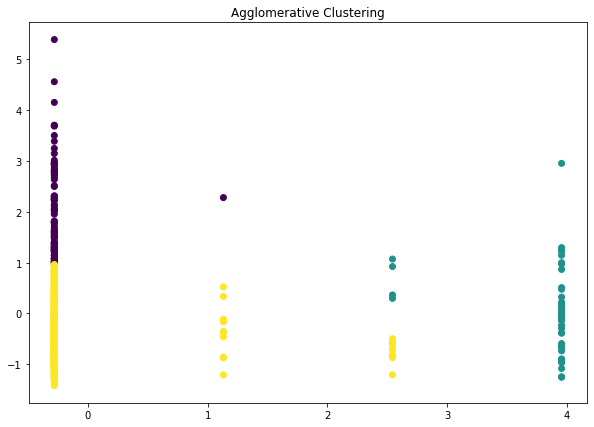

In [289]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(features_owner_yr2)
features_owner_yr2['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_owner_yr2['HOMEOWNER_DESC'], features_owner_yr2[('SALES_VALUE', '2')], c=features_owner_yr2['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [290]:
# Assumption : 4
# Proceeding analysis with Third Assumption ( Trying Hierarchical clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) and MARITAL_STATUS of the customers(n_groups: ? )

In [291]:
# YR : 1

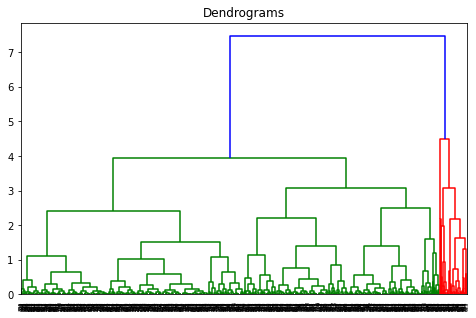

In [292]:
features_marital_yr1 = mergedata_le_scaled2.iloc[:,[1,7]]

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_marital_yr1, method='complete'))


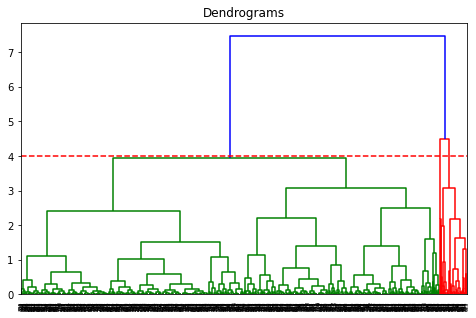

In [293]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_marital_yr1, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

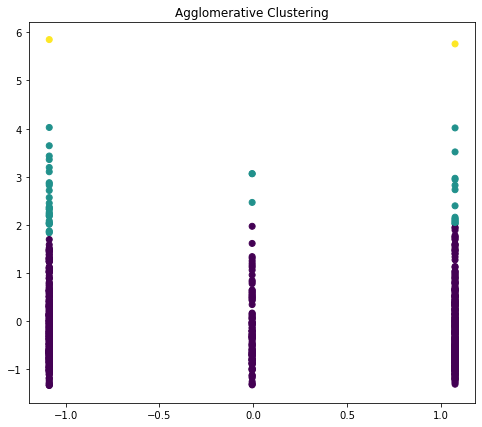

In [294]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(features_marital_yr1)
features_marital_yr1['labels'] = agglom.labels_
plt.figure(figsize=(8, 7))  
plt.scatter(features_marital_yr1['MARITAL_STATUS_CODE'], features_marital_yr1[('SALES_VALUE', '1')], c=features_marital_yr1['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [295]:
# YR : 2

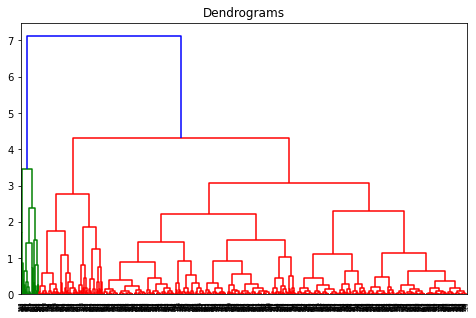

In [296]:
features_marital_yr2 = mergedata_le_scaled2.iloc[:,[1,8]]
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_marital_yr2, method='complete'))

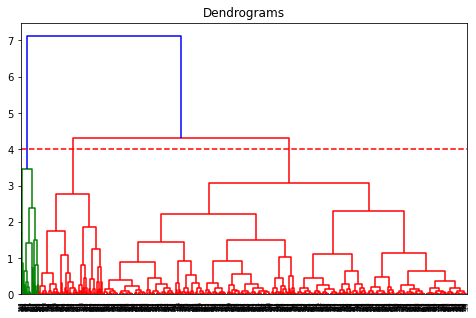

In [297]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_marital_yr2, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

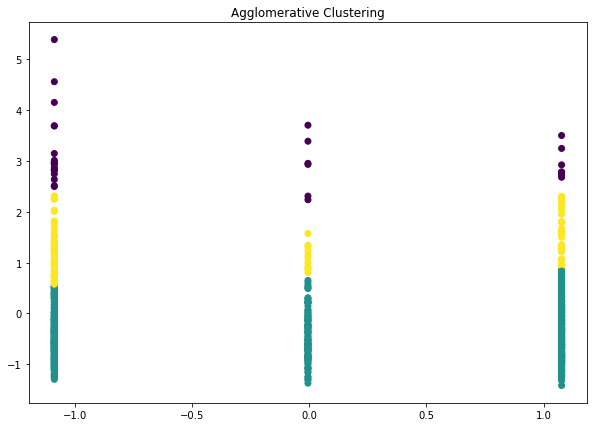

In [298]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(features_marital_yr2)
features_marital_yr2['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_marital_yr2['MARITAL_STATUS_CODE'], features_marital_yr2[('SALES_VALUE', '2')], c=features_marital_yr2['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [299]:
# Assumption : 5
# Proceeding analysis with Third Assumption ( Trying Hierarchical clustering algorithm )
# There might be relationship between Sales value of both the years(First yr + Second Yr) and HH_COMP_DESC(Family Details) of the customers(n_groups: ? )

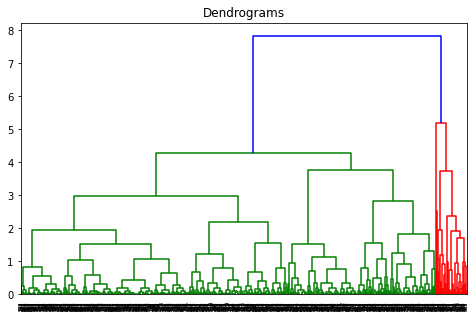

In [300]:
features_familydetails_yr1 = mergedata_le_scaled2.iloc[:,[4,7]]

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_familydetails_yr1, method='complete'))

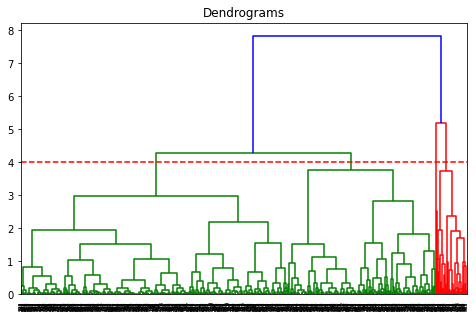

In [301]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_familydetails_yr1, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')


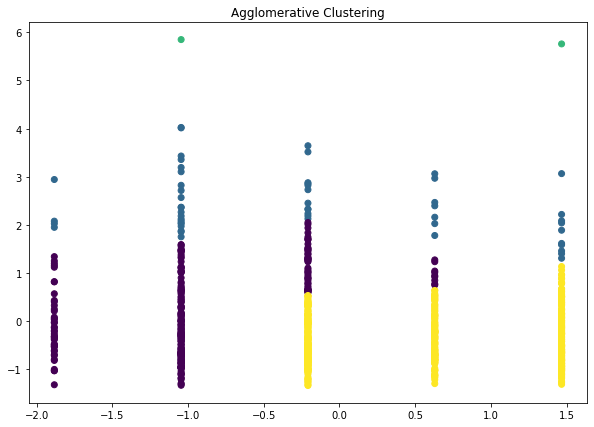

In [302]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(features_familydetails_yr1)
features_familydetails_yr1['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_familydetails_yr1['HH_COMP_DESC'], features_familydetails_yr1[('SALES_VALUE', '1')], c=features_familydetails_yr1['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [303]:
# YR : 2 

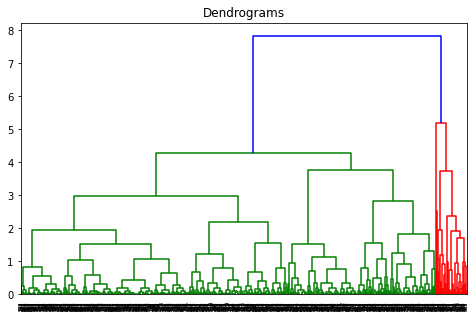

In [304]:
features_familydetails_yr2 = mergedata_le_scaled2.iloc[:,[4,7]]

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_familydetails_yr2, method='complete'))

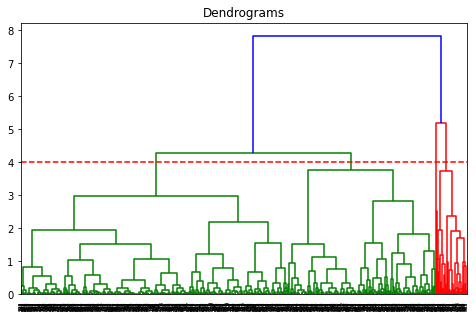

In [305]:
plt.figure(figsize=(8, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_familydetails_yr2, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')

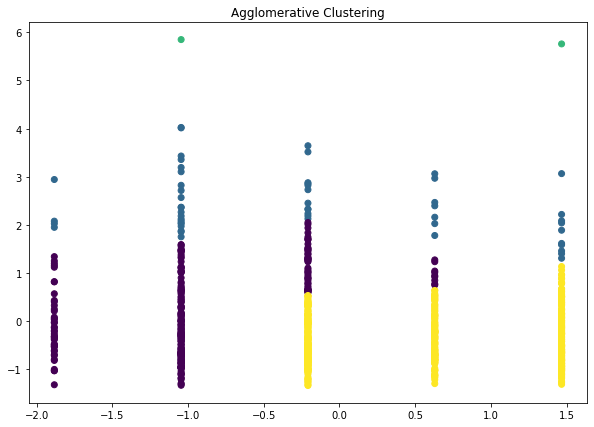

In [306]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(features_familydetails_yr2)
features_familydetails_yr2['labels'] = agglom.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(features_familydetails_yr2['HH_COMP_DESC'], features_familydetails_yr2[('SALES_VALUE', '1')], c=features_familydetails_yr2['labels']) 
plt.plot()
plt.title('Agglomerative Clustering')
plt.show()

In [307]:
# Implementation of mean shift algorithm 

In [308]:
#Analysis of Sales value of both the years(First yr + Second Yr) with income details

In [309]:
features_yr1 = mergedata_le_scaled2.iloc[:,[2,7]]

In [310]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(features_yr1)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_yr1)
features_yr1['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1, 2], dtype=int64)

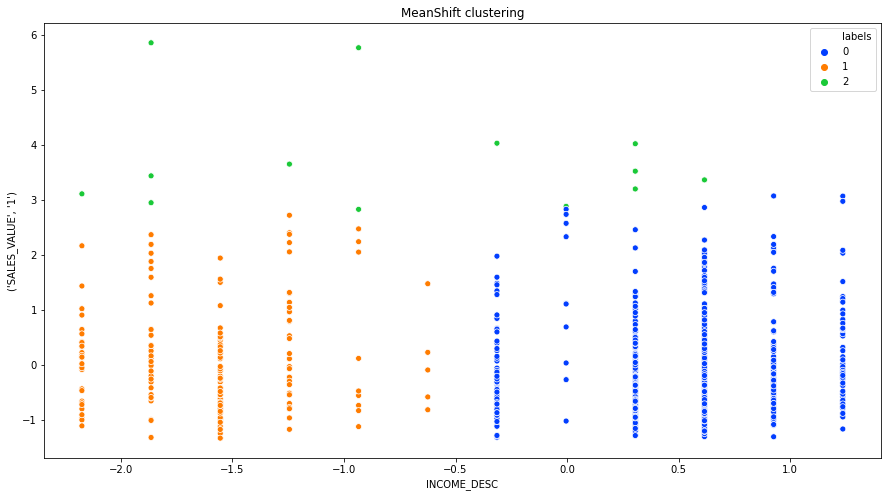

In [311]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_yr1['INCOME_DESC'], features_yr1[('SALES_VALUE', '1')], hue=features_yr1['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [312]:
features_yr2 = mergedata_le_scaled2.iloc[:,[2,8]]

In [313]:
bandwidth = estimate_bandwidth(features_yr2)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_yr2)
features_yr2['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1], dtype=int64)

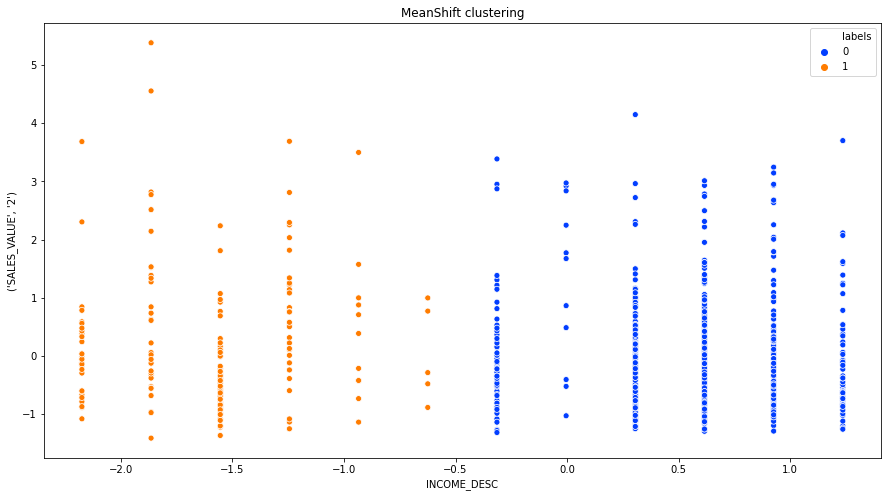

In [314]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_yr2['INCOME_DESC'], features_yr2[('SALES_VALUE', '2')], hue=features_yr2['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [315]:
# Analysis of sales value of both the years(First yr + Second Yr) & age of the customers

In [316]:
features_age_yr1 = mergedata_le_scaled2.iloc[:,[0,7]]

In [317]:
bandwidth = estimate_bandwidth(features_age_yr1)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_yr2)
features_age_yr1['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1], dtype=int64)

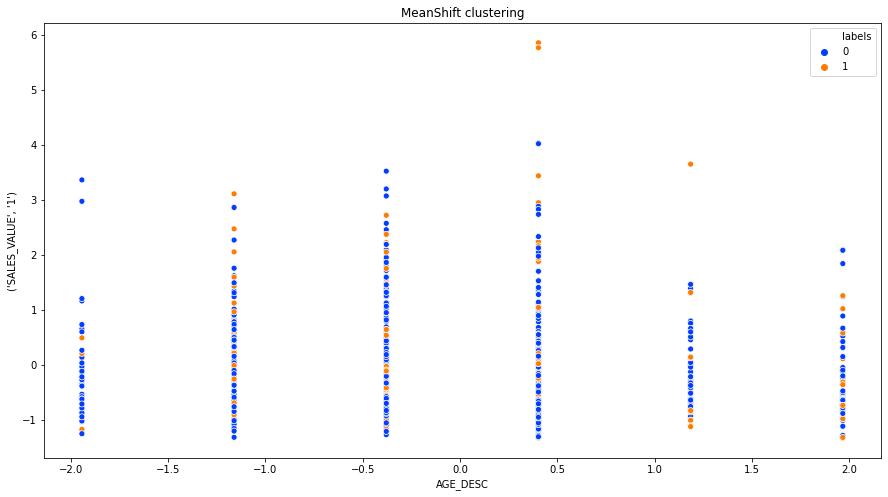

In [318]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_age_yr1['AGE_DESC'], features_age_yr1[('SALES_VALUE', '1')], hue=features_age_yr1['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [319]:
features_age_yr2 = mergedata_le_scaled2.iloc[:,[0,8]]

In [320]:
bandwidth = estimate_bandwidth(features_age_yr2)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_age_yr2)
features_age_yr2['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1], dtype=int64)

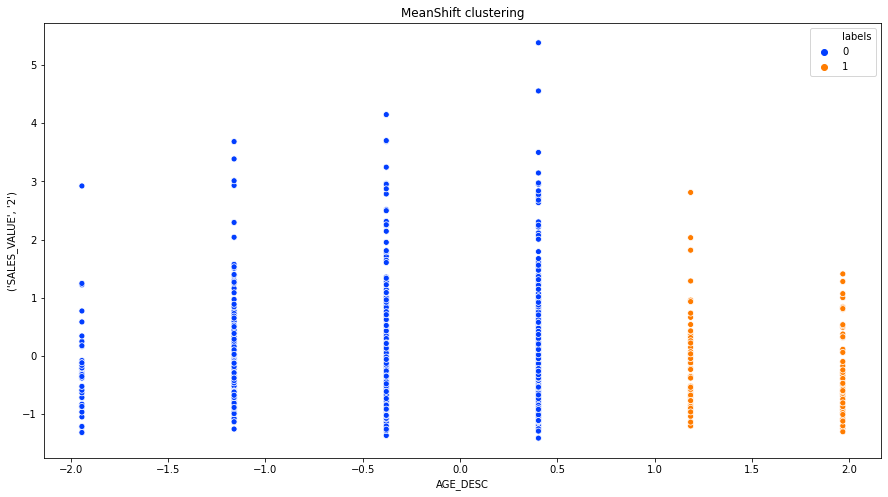

In [321]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_age_yr2['AGE_DESC'], features_age_yr2[('SALES_VALUE', '2')], hue=features_age_yr2['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [322]:
# Analysis of sales value of both the years(First yr + Second Yr) & HOMEOWNER_DESC of the customers

In [323]:
features_owner_yr1 = mergedata_le_scaled2.iloc[:,[3,7]]

In [324]:
bandwidth = estimate_bandwidth(features_owner_yr1)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_owner_yr1)
features_owner_yr1['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

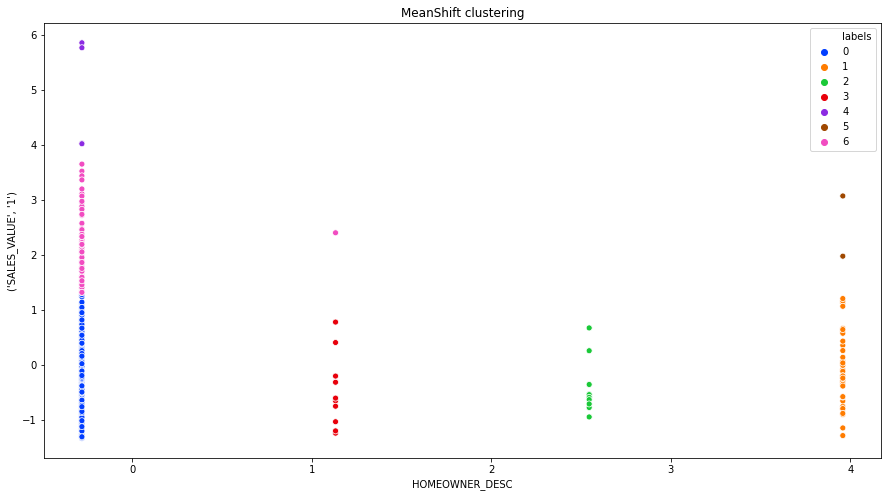

In [325]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_owner_yr1['HOMEOWNER_DESC'], features_owner_yr1[('SALES_VALUE', '1')], hue=features_owner_yr1['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [326]:
features_owner_yr2 = mergedata_le_scaled2.iloc[:,[3,7]]

In [327]:
bandwidth = estimate_bandwidth(features_owner_yr2)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_yr2)
features_owner_yr2['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

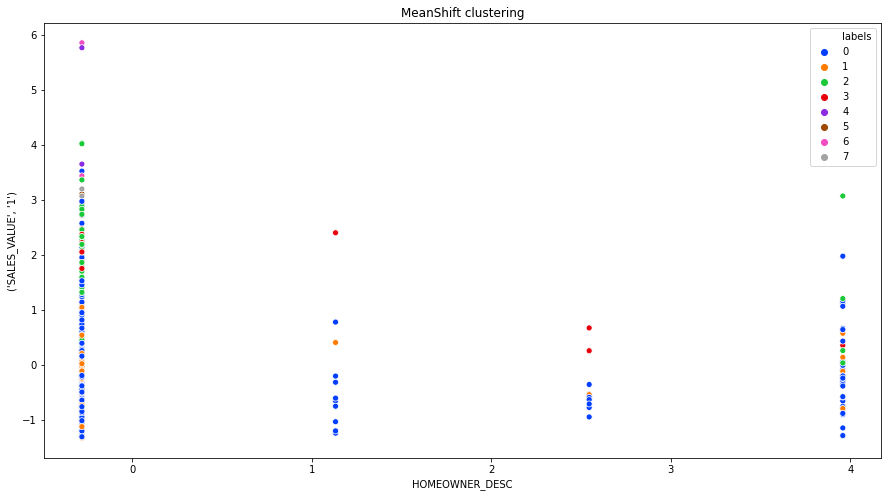

In [328]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_owner_yr2['HOMEOWNER_DESC'], features_owner_yr2[('SALES_VALUE', '1')], hue=features_owner_yr2['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [329]:
#Analysis of Sales value of both the years(First yr + Second Yr) & MARITAL_STATUS of the customers

In [330]:
features_marital_yr1 = mergedata_le_scaled2.iloc[:,[1,7]]


In [331]:
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_marital_yr1)
features_marital_yr1['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int64)

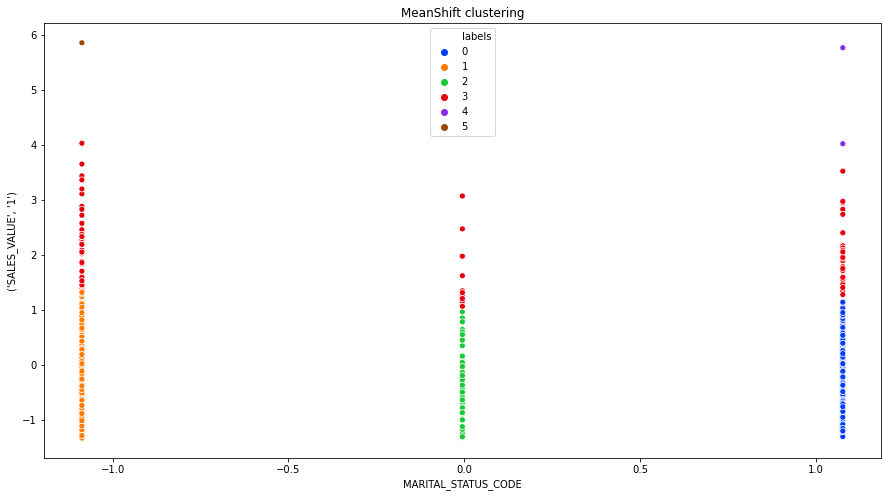

In [332]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_marital_yr1['MARITAL_STATUS_CODE'], features_marital_yr1[('SALES_VALUE', '1')], hue=features_marital_yr1['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [333]:
features_marital_yr2 = mergedata_le_scaled2.iloc[:,[1,8]]

In [334]:
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_marital_yr2)
features_marital_yr2['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int64)

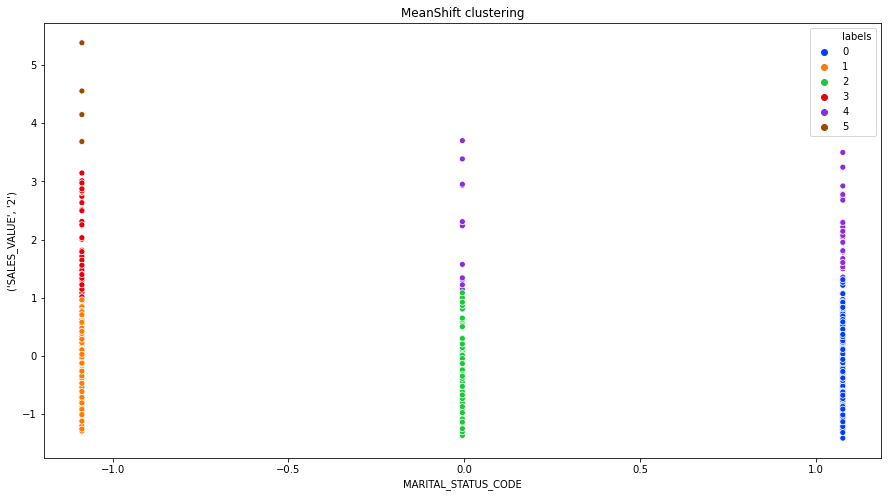

In [335]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_marital_yr2['MARITAL_STATUS_CODE'], features_marital_yr2[('SALES_VALUE', '2')], hue=features_marital_yr2['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [336]:
#Analysis of Sales value of both the years(First yr + Second Yr) & HH_COMP_DESC(Family Details) of the customers

In [337]:
features_familydetails_yr1 = mergedata_le_scaled2.iloc[:,[4,7]]

In [338]:
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_familydetails_yr1)
features_familydetails_yr1['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1, 2, 3], dtype=int64)

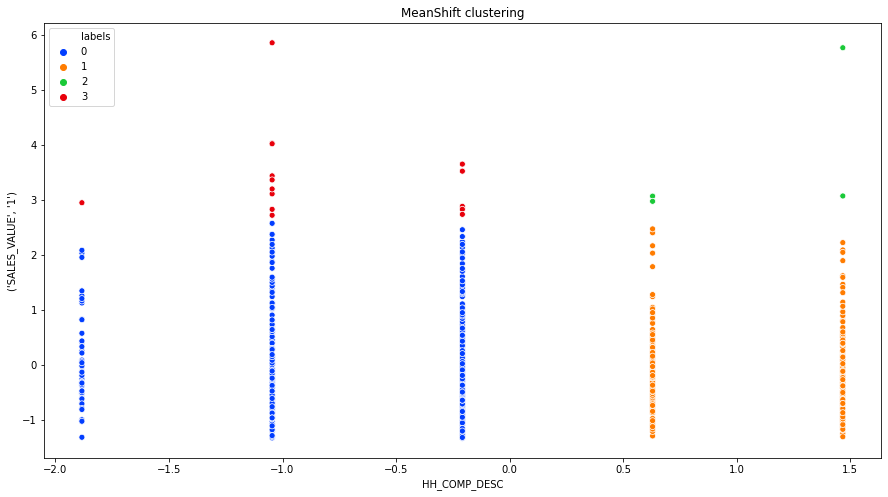

In [339]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_familydetails_yr1['HH_COMP_DESC'], features_familydetails_yr1[('SALES_VALUE', '1')], hue=features_familydetails_yr1['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [340]:
features_familydetails_yr2 = mergedata_le_scaled2.iloc[:,[4,8]]

In [341]:
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(features_familydetails_yr2)
features_familydetails_yr2['labels'] = meanshift.labels_
np.unique(meanshift.labels_)

array([0, 1, 2, 3, 4], dtype=int64)

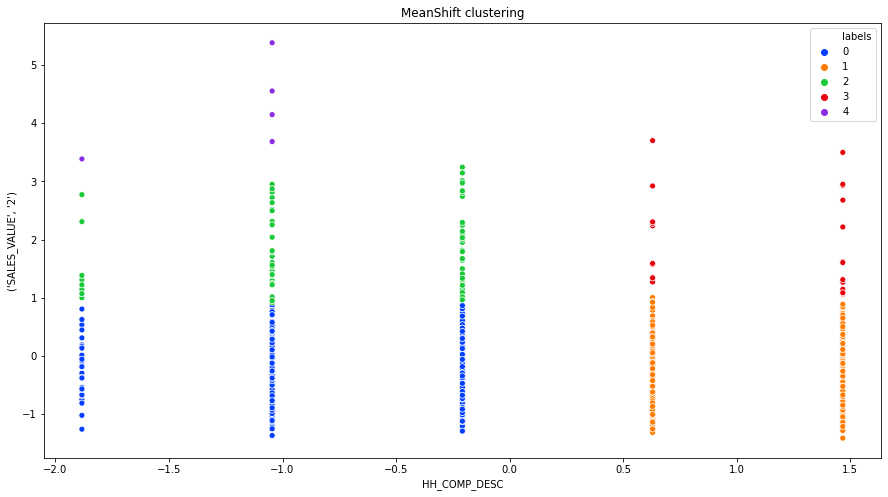

In [342]:
plt.figure(figsize=(15, 8))
sns.scatterplot(features_familydetails_yr2['HH_COMP_DESC'], features_familydetails_yr2[('SALES_VALUE', '2')], hue=features_familydetails_yr2['labels'], 
                palette=sns.color_palette('bright', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering')
plt.show()

In [343]:
################################# Combined Analysis from different algorithms of Clustering ########################

############################################################################################################

#Observing the patterns of sales value and income of the customers in past two years we can conclude :

#Customers earning high(100 - 250K) : 

#A few of them spending high amount of money.  
#Some of them are spending less to medium. 

#Customers earning less(35 - 99k) : 

#A few of them spending high amount of money. 
#Some of them are spending less. 
#Some of them spending pattern is medium range.

############################################################################################################

# Observing sales value and age of the customers in past two years we can conclude :

#Customers within Age Group 35-54 : 
#spending pattern medium to high 
#Some of them spending pattern is low.

#Customers within Age Group 19 -34:
#spending pattern on medium & lower range. 

#Customers within Age Group 55-65:  
#spending pattern lower to medium range. 


############################################################################################################

# Observing sales value and homeowner_desc of the customers in past two years we can conclude :

#Most of the customers of the retailers are Homeowner & their spending pattern lies low, medium & high. 

#Also few customers of the retailers are Renter & their spending pattern is medium. 

############################################################################################################

# Observing sales value and MARITAL_STATUS of the customers in past two years we can conclude :

#Customers with all types of marital status are shoppers of retailer & their spending pattern lies low, medium & high. 

############################################################################################################

# Observing sales value and HH_COMP_DESC(Family Details) of the customers in past two years we can conclude :

#Most of the customers spending pattern was high, their family details are 2 Adults No Kids & 2 Adults Kids.

#Similar spending pattern has been observed for sencond year also but second year 2 adults kids, Single Female & 
#single male's spending pattern was higher compare to first year.

In [ ]:
# Trying to find out percentage of the customers earning high & low to predict the percentage of the customers 
# spending pattern.

In [379]:
mergedata_income = pd.merge(Demodata,pivottranFF,on="household_key",how="left")
mergedata_income.head()

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0      65+                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K        Unknown     2 Adults Kids   
3    25-34                   U      75-99K      Homeowner     2 Adults Kids   
4    45-54                   B      50-74K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  (SALES_VALUE, 1)  \
0                   2      None/Unknown              1           2011.66   
1                   2      None/Unknown              7            879.31   
2                   3                 1              8           2332.29   
3                   4                 2             13           5649.63   
4                   1      None/Unknown             16           1134.99   

   (SALES_VALUE, 2)  
0           2318.50  
1           2520.74  
2           3202.68  
3           7541.29  
4            377.03

In [380]:
# Replacing 'Unknown' values of HOMEOWNER_DESC with Homeowner

mergedata_income.HOMEOWNER_DESC.replace(['Unknown'],['Homeowner'], inplace=True)

# Replacing 'Unknown' values of HH_COMP_DESC with Single Male

mergedata_income.HH_COMP_DESC.replace(['Unknown'],['Single Male'], inplace=True)

# Replacing 5+ values of HOUSEHOLD_SIZE_DESC with 5 

mergedata_income.HOUSEHOLD_SIZE_DESC.replace(['5+'],['5'], inplace=True)

# Replacing Age 65+ of AGE_DESC column with 65 

mergedata_income.AGE_DESC.replace(['65+'],['65'], inplace=True)

mergedata_income.head()

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0       65                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K      Homeowner     2 Adults Kids   
3    25-34                   U      75-99K      Homeowner     2 Adults Kids   
4    45-54                   B      50-74K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  (SALES_VALUE, 1)  \
0                   2      None/Unknown              1           2011.66   
1                   2      None/Unknown              7            879.31   
2                   3                 1              8           2332.29   
3                   4                 2             13           5649.63   
4                   1      None/Unknown             16           1134.99   

   (SALES_VALUE, 2)  
0           2318.50  
1           2520.74  
2           3202.68  
3           7541.29  
4            377.03

In [381]:
# Finding high earning customers details 

In [382]:
# Generalizing high salaries for calculation 

mergedata_income.INCOME_DESC.replace(['100-124K'],['100K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['125-149K'],['100K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['150-174K'],['100K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['250K+'],['100K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['175-199K'],['100K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['200-249K'],['100K'], inplace=True)
mergedata_income.head()

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0       65                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K      Homeowner     2 Adults Kids   
3    25-34                   U      75-99K      Homeowner     2 Adults Kids   
4    45-54                   B      50-74K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  (SALES_VALUE, 1)  \
0                   2      None/Unknown              1           2011.66   
1                   2      None/Unknown              7            879.31   
2                   3                 1              8           2332.29   
3                   4                 2             13           5649.63   
4                   1      None/Unknown             16           1134.99   

   (SALES_VALUE, 2)  
0           2318.50  
1           2520.74  
2           3202.68  
3           7541.29  
4            377.03

In [383]:
#Filtering high earning customers

mergedata_high_earning = mergedata_income.loc[(mergedata_income['INCOME_DESC'] == '100K')]


In [384]:
#Considering 12000k - 6000k/yearly sales as high , 6000K -  2000K/yearly sales as medium , below 2000k/yearly as low.

def sales_yr(x):
        if x > 6000:
            x = 'High'
        elif x > 2000:
            x = 'Medium'
        else:
            x = 'Low'
        return x

In [385]:
mergedata_high_earning['SalesAnalysisYR1'] = mergedata_high_earning[('SALES_VALUE', '1')].apply(sales_yr)
mergedata_high_earning['SalesAnalysisYR2'] = mergedata_high_earning[('SALES_VALUE', '2')].apply(sales_yr)
mergedata_high_earning.head()

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
6     45-54                   A        100K      Homeowner  2 Adults No Kids   
13    35-44                   A        100K      Homeowner  2 Adults No Kids   
17    45-54                   A        100K      Homeowner     2 Adults Kids   
22    55-64                   A        100K      Homeowner     2 Adults Kids   
24    25-34                   A        100K      Homeowner     2 Adults Kids   

   HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  (SALES_VALUE, 1)  \
6                    2      None/Unknown             18           2698.76   
13                   2      None/Unknown             39           3009.01   
17                   5                3+             46           2643.84   
22                   4                 2             56           2712.53   
24                   4                 2             58           4517.18   

    (SALES_VALUE, 2) SalesAnalysisYR1 SalesAnalysisYR2  
6            4420.15           Medium           Medium  
13           2024.65           Medium           Medium  
17           5789.59           Medium           Medium  
22           3979.00           Medium           Medium  
24           5849.90           Medium           Medium

In [386]:
sales_value_analysis_high_income = mergedata_high_earning.iloc[:,[10,11]]
sales_value_analysis_high_income.head()

SalesAnalysisYR1 SalesAnalysisYR2
6            Medium           Medium
13           Medium           Medium
17           Medium           Medium
22           Medium           Medium
24           Medium           Medium

In [387]:
def pie_categorical(sales_value_analysis_high_income):
    #function to plot the histogram of categorical variables in pie graph
    features = sales_value_analysis_high_income.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(10,7))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        sales_value_analysis_high_income[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1
def hist_numeric(sales_value_analysis_high_income):
    #function to plot the histogram of numeric variables
    features = sales_value_analysis_high_income.columns
    fig_hists = plt.figure(figsize=(10,7))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        sales_value_analysis_high_income[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

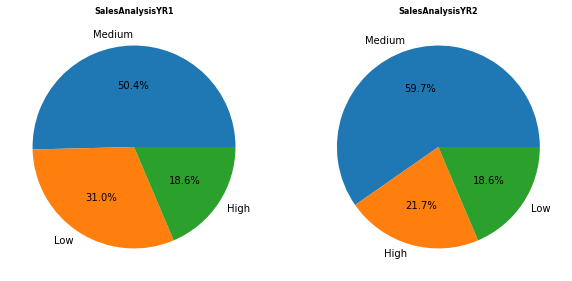

In [388]:
pie_categorical(sales_value_analysis_high_income)

In [ ]:
# Finding Low earning customers details 


In [390]:
# Generalizing high salaries for calculation 

mergedata_income.INCOME_DESC.replace(['35-49K'],['99K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['50-74K'],['99K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['25-34K'],['99K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['75-99K'],['99K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['Under 15K'],['99K'], inplace=True)
mergedata_income.INCOME_DESC.replace(['15-24K'],['99K'], inplace=True)
mergedata_income.head()

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0       65                   A         99K      Homeowner  2 Adults No Kids   
1    45-54                   A         99K      Homeowner  2 Adults No Kids   
2    25-34                   U         99K      Homeowner     2 Adults Kids   
3    25-34                   U         99K      Homeowner     2 Adults Kids   
4    45-54                   B         99K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  (SALES_VALUE, 1)  \
0                   2      None/Unknown              1           2011.66   
1                   2      None/Unknown              7            879.31   
2                   3                 1              8           2332.29   
3                   4                 2             13           5649.63   
4                   1      None/Unknown             16           1134.99   

   (SALES_VALUE, 2)  
0           2318.50  
1           2520.74  
2           3202.68  
3           7541.29  
4            377.03

In [391]:
#Filtering low earning customers

mergedata_income_low_earning = mergedata_income.loc[(mergedata_income['INCOME_DESC'] == '99K')]

In [392]:
mergedata_income_low_earning['SalesAnalysisYR1'] = mergedata_income_low_earning[('SALES_VALUE', '1')].apply(sales_yr)
mergedata_income_low_earning['SalesAnalysisYR2'] = mergedata_income_low_earning[('SALES_VALUE', '2')].apply(sales_yr)
mergedata_income_low_earning.head()


AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0       65                   A         99K      Homeowner  2 Adults No Kids   
1    45-54                   A         99K      Homeowner  2 Adults No Kids   
2    25-34                   U         99K      Homeowner     2 Adults Kids   
3    25-34                   U         99K      Homeowner     2 Adults Kids   
4    45-54                   B         99K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  (SALES_VALUE, 1)  \
0                   2      None/Unknown              1           2011.66   
1                   2      None/Unknown              7            879.31   
2                   3                 1              8           2332.29   
3                   4                 2             13           5649.63   
4                   1      None/Unknown             16           1134.99   

   (SALES_VALUE, 2) SalesAnalysisYR1 SalesAnalysisYR2  
0           2318.50           Medium           Medium  
1           2520.74              Low           Medium  
2           3202.68           Medium           Medium  
3           7541.29           Medium             High  
4            377.03              Low              Low

In [393]:

sales_value_analysis_low_income = mergedata_income_low_earning.iloc[:,[10,11]]
sales_value_analysis_low_income.head()

SalesAnalysisYR1 SalesAnalysisYR2
0           Medium           Medium
1              Low           Medium
2           Medium           Medium
3           Medium             High
4              Low              Low

In [396]:
def pie_categorical(sales_value_analysis_low_income):
    #function to plot the histogram of categorical variables in pie graph
    features = sales_value_analysis_low_income.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(10,7))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        sales_value_analysis_low_income[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1
def hist_numeric(sales_value_analysis_low_income):
    #function to plot the histogram of numeric variables
    features = sales_value_analysis_low_income.columns
    fig_hists = plt.figure(figsize=(10,7))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        sales_value_analysis_low_income[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1


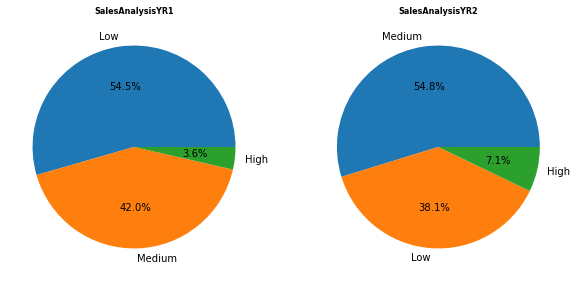

In [397]:
pie_categorical(sales_value_analysis_low_income)

In [ ]:
#Analysis with percentage: 

############################################################################################################

#Observing the patterns of sales value and income of the customers in past two years we can conclude :

#Customers earning high(100 - 250K) : 

#A few of them spending high amount of money.  
#Some of them are spending less to medium. 

#Customers earning less(35 - 99k) : 

#A few of them spending high amount of money. 
#Some of them are spending less. 
#Some of them spending pattern is medium range.

#Total no of customers : 801

#Customers earning high : 133 (Based on percentage calculation)
#Customers earning Low : 668 (Based on percentage calculation)

#Customers earning high YR1:
#spending pattern medium : 50.4% 
#spending pattern low : 31% 
#spending pattern high : 18.6% 

#Customers earning high YR2:
#spending pattern medium : 59.7% 
#spending pattern low : 18.6% 
#spending pattern high : 21.7% 

#Customers earning low YR1:
#spending pattern medium : 42.0% 
#spending pattern low : 54.5% 
#spending pattern high : 3.6% 

#Customers earning low YR2:
#spending pattern medium : 54.8% 
#spending pattern low : 38.1% 
#spending pattern high : 7.1% 

############################################################################################################

# Observing sales value and age of the customers in past two years we can conclude :
 
#Customers within Age Group 35-54 : 
#Most of them Spending pattern medium to high 
#Most of them Some of the customers spending pattern is low.

#Customers within Age Group 19 -34:
#Most of them Spending pattern on medium & lower range. 

#Customers within Age Group 55-65:  
#Most of them Spending pattern lower to medium range. 

#Customers within Age Group 35-54 : (24.2 +36)% = 60.2% = 482

#Customers within Age Group 19-34 : (5.7 + 17.7)% = 23.4% = 187

#Customers within Age Group 55-65: (7.4 + 9.0)% = 16.4% = 131

############################################################################################################

# Observing sales value and homeowner_desc of the customers in past two years we can conclude :

#Most of the customers of the retailers are Homeowner & their spending pattern lies low, medium & high. 

#Also few customers of the retailers are Renter & their spending pattern is medium. 

#Majority of the customers are homeowner (62.9%) = 503 

############################################################################################################

# Observing sales value and MARITAL_STATUS of the customers in past two years we can conclude :

#Customers with all types of marital status are shoppers of retailer & their spending pattern lies low, medium & high. 

############################################################################################################

# Observing sales value and HH_COMP_DESC(Family Details) of the customers in past two years we can conclude :

#Most of the customers spending pattern was high, their family details are 2 Adults No Kids & 2 Adults Kids.

#Similar spending pattern has been observed for sencond year also but second year 2 adults kids, Single Female & 
#single male's spending pattern was higher compare to first year.

#Customers with 2 Adults No Kids = 31.8% 

#Customers with 2 Adults Kids = 23.3% 

#Coustomers with Single Female = 18%

#Customers with Single Male = 11.9%

